## Import Libraries

In [2]:
import csv
import pandas as pd
import numpy as np
import seaborn as sns
# sns.set_theme()
import matplotlib.pyplot as plt
%matplotlib inline
# from ydata_profiling import ProfileReport


## Read csv file with pandas

In [3]:
# read csv file
census_data = pd.read_csv("census05 - Copy.csv")

In [4]:
# Code validation
census_data  

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
0,1,Cannon Street,Steven,Webster,45,Head,Single,Male,Chief Technology Officer,None,None
1,1,Cannon Street,Wayne,Perkins,39,None,Single,Male,"Therapist, horticultural",None,None
2,1,Cannon Street,Garry,O'Sullivan,43,None,Single,Male,Records manager,None,Methodist
3,1,Cannon Street,Jenna,Herbert,62,None,Single,Female,Outdoor activities/education manager,None,None
4,2,Cannon Street,Katy,Johnson,48,Head,Single,Female,"Loss adjuster, chartered",None,None
...,...,...,...,...,...,...,...,...,...,...,...
5995,1,Guinevere Cottage,Emily,Payne,30,Head,Married,Female,Associate Professor,None,None
5996,1,Guinevere Cottage,Jeffrey,Payne,36,Husband,Married,Male,English as a second language teacher,None,None
5997,1,Guinevere Cottage,Tony,Payne,2,Son,NaN,Male,Child,None,NaN
5998,1,Guinevere Cottage,Yvonne,Payne,1,Daughter,NaN,Female,Child,None,NaN


#### This method prints information about a DataFrame including the index dtype and columns, non-null values and memory usage.

In [5]:
# This method prints information about a DataFrame including the index, dtype, columns, and memory usage.
census_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   House Number                   6000 non-null   int64 
 1   Street                         6000 non-null   object
 2   First Name                     6000 non-null   object
 3   Surname                        6000 non-null   object
 4   Age                            6000 non-null   object
 5   Relationship to Head of House  6000 non-null   object
 6   Marital Status                 4719 non-null   object
 7   Gender                         6000 non-null   object
 8   Occupation                     6000 non-null   object
 9   Infirmity                      6000 non-null   object
 10  Religion                       4681 non-null   object
dtypes: int64(1), object(10)
memory usage: 515.8+ KB


In [6]:
# Replace all empty string cells with nan to identify empty cells in dataset
# census_data.replace(' ', np.nan, inplace=True)

In [7]:
census_data[census_data.duplicated() == True]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


In [8]:
# the population count from the census data
population_count = len(census_data)

In [9]:
# this method Checks dataset for null values
census_data.isnull().sum()

House Number                        0
Street                              0
First Name                          0
Surname                             0
Age                                 0
Relationship to Head of House       0
Marital Status                   1281
Gender                              0
Occupation                          0
Infirmity                           0
Religion                         1319
dtype: int64

## Age Cleaning Column

In [10]:
# this method checks for unique values
census_data['Age'].unique()

array(['45', '39', '43', '62', '48', '16', '14', '11', '18', '19', '52',
       '51', '24', '9', '58', '59', '1', '34', '25', '42', '6', '2', '67',
       '65', '36', '28', '22', '40', '47', '3', '20', '26', '38', '0',
       '21', '54', '95', '97', '10', '49', '30', '4', '37', '57', '27',
       '41', '56', '60', '23', '64', '44', '13', '55', '8', '35', '74',
       '78', '63', '31', '61', '7', '72', '46', '29', '32', '15', '53',
       '76', '5', '88', '50', '33', '77', '17', '79', '70', '80', '68',
       '85', '84', '75', '83', '82', '12', '86', '92', '73', '66', '71',
       '69', '89', '90', '87', '56.718750360298415', '1.0', ' ', '102',
       '96', '98', '99', '93', '81', '94', '67.66437863917258',
       '8.999999999999993', '4.999999999999993', '2.999999999999993',
       '75.34659211357395', '14.0', '10.0', '78.51677642502452',
       '33.99999999999999', '30.999999999999993', '28.999999999999993',
       '100', '105', '50.11379719017628', '3.0', '2.0', '0.0', '103',
       

In [11]:
census_data['Age'].describe()

count     6000
unique     123
top         19
freq       119
Name: Age, dtype: object

In [12]:
# Locate empty entry in the Age column
census_data.loc[census_data['Age']== ' ']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
999,4,Dodd Street,Marilyn,Bradley,,Head,Married,Female,Dealer,None,None


In [13]:
# Checking  for relationship of the empty entry with other entries with similar surname 
census_data.loc[census_data['Surname']== 'Bradley']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
556,8,Parry Crescent,Maurice,Bradley,21,Lodger,Single,Male,University Student,None,Christian
981,50,Wessex Drive,Debra,Bradley,39,Head,Single,Female,Print production planner,None,None
999,4,Dodd Street,Marilyn,Bradley,,Head,Married,Female,Dealer,None,None
1000,4,Dodd Street,Patrick,Bradley,58,Husband,Married,Male,Event organiser,None,None
1001,4,Dodd Street,Sheila,Bradley,20,Daughter,Single,Female,University Student,None,None
1002,4,Dodd Street,Leah,Bradley,17,Daughter,NaN,Female,Student,None,NaN
1003,4,Dodd Street,Gail,Bradley,15,Daughter,NaN,Female,Student,None,NaN
1412,46,Jones Cape,Clare,Bradley,61,Head,Single,Female,Product/process development scientist,None,Methodist
1829,50,Jones Avenue,Callum,Bradley,57,Head,Single,Male,Mudlogger,None,Christian
2982,26,Middleton Prairie,Rita,Bradley,37,Head,Married,Female,"Editor, magazine features",None,None


In [14]:
# replaced the missing with the mode age for married females
census_data.loc[(census_data['Marital Status'] == 'Married') & (census_data['Gender'] == 'Female')].mode()

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
0,1,Threpenny Road,Diana,Jones,48,Head,Married,Female,Unemployed,None,None


In [15]:
# Replaced missing age with mode age of married females
census_data["Age"].replace(' ', 48, inplace=True)

In [16]:
# checking for relationship with missing age value
census_data.loc[census_data['Surname']== 'Bradley']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
556,8,Parry Crescent,Maurice,Bradley,21,Lodger,Single,Male,University Student,None,Christian
981,50,Wessex Drive,Debra,Bradley,39,Head,Single,Female,Print production planner,None,None
999,4,Dodd Street,Marilyn,Bradley,48,Head,Married,Female,Dealer,None,None
1000,4,Dodd Street,Patrick,Bradley,58,Husband,Married,Male,Event organiser,None,None
1001,4,Dodd Street,Sheila,Bradley,20,Daughter,Single,Female,University Student,None,None
1002,4,Dodd Street,Leah,Bradley,17,Daughter,NaN,Female,Student,None,NaN
1003,4,Dodd Street,Gail,Bradley,15,Daughter,NaN,Female,Student,None,NaN
1412,46,Jones Cape,Clare,Bradley,61,Head,Single,Female,Product/process development scientist,None,Methodist
1829,50,Jones Avenue,Callum,Bradley,57,Head,Single,Male,Mudlogger,None,Christian
2982,26,Middleton Prairie,Rita,Bradley,37,Head,Married,Female,"Editor, magazine features",None,None


In [17]:
# Dropping empty entry
# census_data = census_data.drop(census_data[census_data["Age"] ==" "].index[0])

In [18]:
# Type Conversion to float
census_data['Age'] = census_data['Age'].astype(float)

In [19]:
# Type conversion from float to int and rounding up to whole numbers
census_data['Age'] = census_data['Age'].apply(lambda x: int(round(x)))

In [20]:
# Code validation
census_data['Age'].dtype

dtype('int64')

In [21]:
# Checkinh for outliers
census_data.loc[census_data['Age']== 105]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
2687,80,Evans Hills,Valerie,Bell,105,Head,Divorced,Female,Retired Sports administrator,None,None
3143,28,Smith Islands,Billy,Ahmed,105,Head,Married,Male,Retired Exercise physiologist,None,Christian


In [22]:
# Age distribution
census_data['Age'].describe()

count    6000.000000
mean       36.801833
std        21.721776
min         0.000000
25%        19.000000
50%        35.000000
75%        52.000000
max       105.000000
Name: Age, dtype: float64

## Age Distribution Plots

In [23]:
age_grade = pd.cut(census_data['Age'],[0,10,20,30,40,50,60,70,80,90,100,110],
                   labels=['0-9','10-19','20-29','30-39','40-49','50-59','60-69','70-79','80-89','90-99','100-109'],
                   include_lowest=True)

census_data.insert(5, 'Age Grade', age_grade)

In [24]:
census_data['Age Grade']

0       40-49
1       30-39
2       40-49
3       60-69
4       40-49
        ...  
5995    20-29
5996    30-39
5997      0-9
5998      0-9
5999    40-49
Name: Age Grade, Length: 6000, dtype: category
Categories (11, object): ['0-9' < '10-19' < '20-29' < '30-39' ... '70-79' < '80-89' < '90-99' < '100-109']

In [25]:
age_grade_groupby_gender=census_data.groupby('Age Grade')['Gender'].value_counts()

In [26]:
age_grade_groupby_gender= age_grade_groupby_gender.unstack()

In [27]:
age_grade_groupby_gender['Female']

Age Grade
0-9        369
10-19      437
20-29      478
30-39      530
40-49      484
50-59      368
60-69      263
70-79      126
80-89       80
90-99       10
100-109      4
Name: Female, dtype: int64

In [28]:
age_grade_groupby_gender

Gender,Female,Male
Age Grade,,
0-9,369,377
10-19,437,417
20-29,478,453
30-39,530,421
40-49,484,401
50-59,368,338
60-69,263,232
70-79,126,125
80-89,80,69


In [29]:
age_grade_groupby_gender['Male']

Age Grade
0-9        377
10-19      417
20-29      453
30-39      421
40-49      401
50-59      338
60-69      232
70-79      125
80-89       69
90-99       12
100-109      6
Name: Male, dtype: int64

In [30]:
age_dataframe= pd.DataFrame({'Age':['0-9','10-19','20-29','30-39','40-49','50-59','60-69','70-79','80-89','90-99','100-109'],
                             'Male':age_grade_groupby_gender['Male']* -1,
                            'Female':age_grade_groupby_gender['Female']})

In [31]:
age_dataframe

,Age,Male,Female
Age Grade,,,
0-9,0-9,-377,369
10-19,10-19,-417,437
20-29,20-29,-453,478
30-39,30-39,-421,530
40-49,40-49,-401,484
50-59,50-59,-338,368
60-69,60-69,-232,263
70-79,70-79,-125,126
80-89,80-89,-69,80


In [32]:
age_dataframe.index

CategoricalIndex(['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69',
                  '70-79', '80-89', '90-99', '100-109'],
                 categories=['0-9', '10-19', '20-29', '30-39', ..., '70-79', '80-89', '90-99', '100-109'], ordered=True, dtype='category', name='Age Grade')

In [33]:
census_data.loc[census_data['Age Grade'] == '100-109' ]

,House Number,Street,First Name,Surname,Age,Age Grade,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
1019,7,Ely Road,Benjamin,Hussain,102,100-109,Head,Widowed,Male,"Retired Pharmacist, community",None,Christian
1340,4,Jones Cape,Paul,Finch,102,100-109,Head,Married,Male,"Retired Producer, television/film/video",None,Christian
2610,28,Evans Hills,Grace,Robson,102,100-109,Head,Widowed,Female,Retired Herbalist,None,Christian
2687,80,Evans Hills,Valerie,Bell,105,100-109,Head,Divorced,Female,Retired Sports administrator,None,None
3143,28,Smith Islands,Billy,Ahmed,105,100-109,Head,Married,Male,Retired Exercise physiologist,None,Christian
3144,28,Smith Islands,Carole,Ahmed,102,100-109,Wife,Married,Female,"Retired Conservator, museum/gallery",None,None
4094,26,Rose Harbor,Sally,Knight,103,100-109,Head,Married,Female,"Retired Therapist, sports",None,Muslim
4095,26,Rose Harbor,Hugh,Knight,101,100-109,Husband,Married,Male,"Retired Engineer, electrical",None,None
4155,2,Dixon Station,John,Reed,101,100-109,Head,Widowed,Male,Retired Exhibition designer,None,Christian
4988,26,Clark Causeway,Roy,Allen,104,100-109,Head,Widowed,Male,Retired Hydrologist,None,None


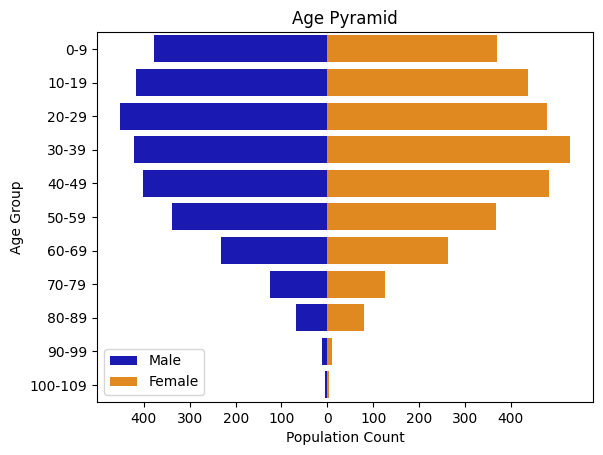

In [34]:
age_pyramid= sns.barplot(x='Male', y='Age', data=age_dataframe, order=age_dataframe.index, color= ('mediumblue'), label='Male')
age_pyramid= sns.barplot(x='Female', y='Age', data=age_dataframe, order=age_dataframe.index, color= ('darkorange'), label='Female')

# figure(figsize=(15,12), dpi=80)
age_pyramid.legend()
age_pyramid.set_title('Age Pyramid')
age_pyramid.set(xlabel='Population Count', ylabel='Age Group')
age_pyramid.figure.savefig("Age_pyramidd.png")
plt.xticks([-400,-300,-200,-100,0,100,200,300,400],[400,300,200,100,0,100,200,300,400])
plt.show()

In [35]:
# Code validation
census_data.iloc[1]

House Number                                            1
Street                                      Cannon Street
First Name                                          Wayne
Surname                                           Perkins
Age                                                    39
Age Grade                                           30-39
Relationship to Head of House                        None
Marital Status                                     Single
Gender                                               Male
Occupation                       Therapist, horticultural
Infirmity                                            None
Religion                                             None
Name: 1, dtype: object

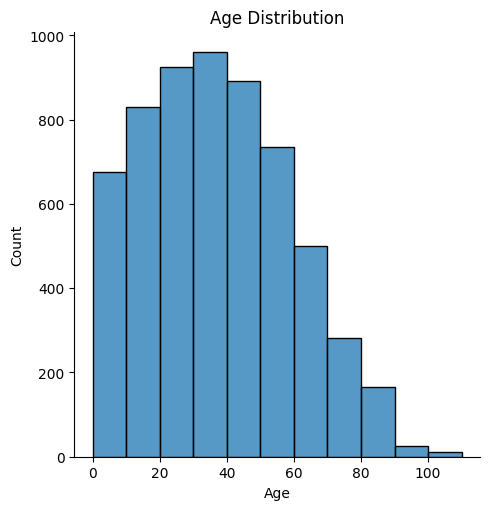

In [36]:
# Age distribution plot againt gender
age_distribution= sns.displot(census_data, x='Age', binwidth = 10)
plt.title('Age Distribution')
plt.show()
age_distribution.savefig("age_distribution.png", dpi=90)

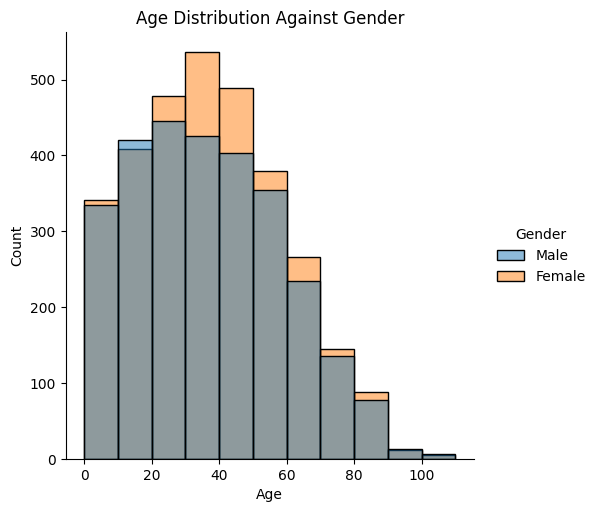

In [37]:
# Age distribution plot againt gender
age_gender_mix= sns.displot(census_data, x='Age', hue='Gender', binwidth = 10)
plt.title('Age Distribution Against Gender')
plt.show()
age_gender_mix.savefig("age_gender_mix.png", dpi=90)

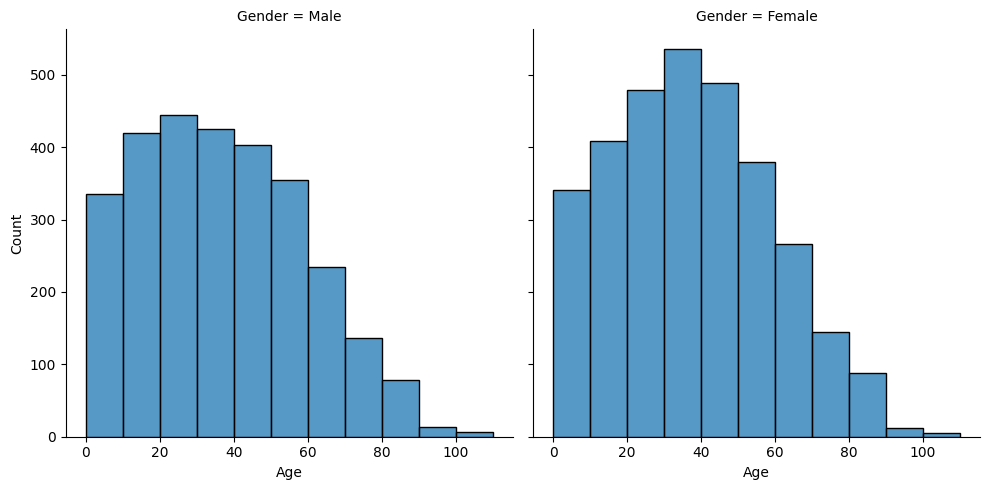

In [38]:
# Age distribution plots againt gender
age_gender_col = sns.displot(census_data, x='Age', col='Gender', binwidth = 10)
age_gender_col.savefig("age_gender_col.png")

## House number Column

In [39]:
# checking for empty values and replacing with NaN values
census_data['House Number'].replace(' ', np.nan, inplace=True)

In [40]:
# checking for unique values
census_data['House Number'].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160], dtype=int64)

In [41]:
# statistical analysis for the house number
census_data['House Number'].describe()

count    6000.000000
mean       22.843500
std        24.719841
min         1.000000
25%         7.000000
50%        15.000000
75%        31.000000
max       160.000000
Name: House Number, dtype: float64

## Street Column

In [42]:
# checking for empty values and replacing with NaN values
census_data['Street'].replace(' ', 'None', inplace=True)

In [43]:
census_data['Street'].value_counts()

Threpenny Road       290
Evans Hills          243
Parry Crescent       230
Jones Cape           227
Scotland Road        208
                    ... 
Woodward Haven         5
Davies Cottage         5
Young Cabin            5
Guinevere Cottage      5
Dixon Station          4
Name: Street, Length: 105, dtype: int64

In [44]:
# checking for unique values
census_data['Street'].unique()

array(['Cannon Street', 'September Lake', 'Gill Heights',
       'Musictill Drive', 'Friary Spurs', 'Hereford Road', 'Ripon Port',
       'Parry Crescent', 'Marsh Lane', 'Wessex Drive', 'Dodd Street',
       'Ely Road', 'Mitchell Crossing', 'Pigeonpound Lane',
       'Violetloop Road', 'Davies Crescent', 'Price Locks',
       'Knowles Street', 'Anglia Road', 'Lichfieldcharm Drive',
       'Jones Cape', 'Gwent Lock', 'Powell Coves', 'Hall Loop',
       'Farrell Avenue', 'Jones Avenue', 'Portsmouth Rest',
       'Gibbs Crescent', 'Hopkins Crescent', 'Threpenny Road',
       'Dolphin Walks', 'Evans Hills', 'Spring Prairie', 'Farthing Burgs',
       'James Avenue', 'Middleton Prairie', 'Hove Crescent',
       'Collier Squares', 'Glory Crescent', 'Smith Islands',
       'Hove Unions', 'Leisure Mall', 'Newcastle River', 'Penny Drive',
       'Chester Road', 'Gardner Crescent', 'Johnson Road',
       'Fisher Rapids', 'Knight Avenue', 'Morar Course', 'Scotland Road',
       'Powell Road', 'Har

In [45]:
# checking for none entries on the stret column
census_data.loc[census_data['Street'] == 'None']

,House Number,Street,First Name,Surname,Age,Age Grade,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


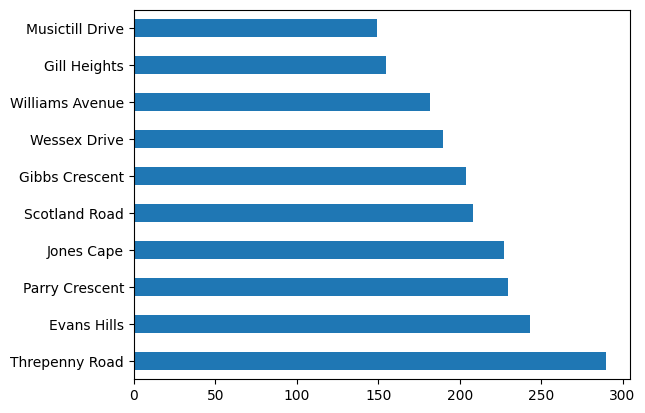

In [46]:
# sns.displot(census_data, x='Street', binwidth = 10)
most_occuring_streets = census_data['Street'].value_counts().head(10).plot(kind='barh')
most_occuring_streets.figure.savefig("most_occuring_streets.png")

In [47]:
# Number of houses per street
house_per_street = census_data.groupby('Street')['House Number'].nunique()

In [48]:
# creating a columns showing street and number of occupants
houses_street = pd.DataFrame(house_per_street.sort_values(ascending=False)).reset_index()
houses_street.columns = ['Street', 'occupants']
houses_street

,Street,occupants
0,Evans Hills,160
1,Jones Cape,138
2,Jones Avenue,79
3,Threpenny Road,77
4,Parry Crescent,60
...,...,...
100,Bradford Cottage,1
101,King Obervatory,1
102,Blue Granary,1
103,Woodward Haven,1


In [49]:
house_count = census_data.groupby(['House Number','Street']).size().reset_index(name= 'number_of_occupants')
house_count

,House Number,Street,number_of_occupants
0,1,Anglia Road,3
1,1,Bennett Islands,2
2,1,Blue Granary,5
3,1,Bradford Cottage,12
4,1,Butcher Avenue,5
...,...,...,...
2325,156,Evans Hills,1
2326,157,Evans Hills,1
2327,158,Evans Hills,1
2328,159,Evans Hills,2


In [50]:
average_occupancy = population_count / len(house_count)
average_occupancy

2.575107296137339

In [51]:
# person_per_house.describe()

In [52]:
# house_counts['occupancy_level'] = population_count.apply(lambda x: 'under-used' if x < average_occupancy else 'over-used' if x > average_occupancy else 'optimal')

In [53]:
house_count.loc[house_count['number_of_occupants'] == 4, 'Occupancy Level']= 'Optimal'
house_count.loc[house_count['number_of_occupants'] > 4, 'Occupancy Level']= 'Over-used'
house_count.loc[house_count['number_of_occupants'] <= 3, 'Occupancy Level']= 'Under-used'
house_count

,House Number,Street,number_of_occupants,Occupancy Level
0,1,Anglia Road,3,Under-used
1,1,Bennett Islands,2,Under-used
2,1,Blue Granary,5,Over-used
3,1,Bradford Cottage,12,Over-used
4,1,Butcher Avenue,5,Over-used
...,...,...,...,...
2325,156,Evans Hills,1,Under-used
2326,157,Evans Hills,1,Under-used
2327,158,Evans Hills,1,Under-used
2328,159,Evans Hills,2,Under-used


In [54]:
house_count['Occupancy Level'].value_counts()

Under-used    1686
Optimal        362
Over-used      282
Name: Occupancy Level, dtype: int64

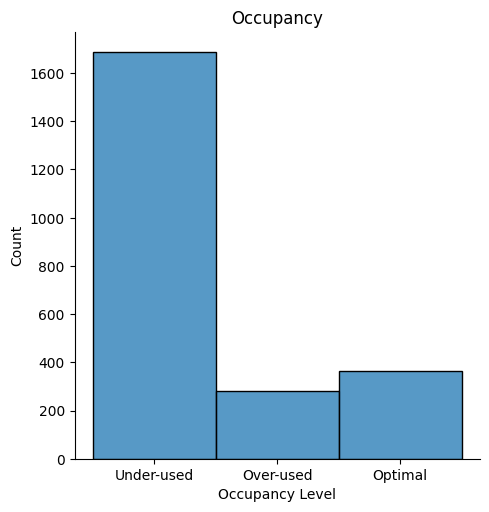

In [55]:
sns.displot(house_count, x='Occupancy Level')
plt.title('Occupancy')
plt.savefig('Occupancy.png', dpi=200, bbox_inches='tight')
plt.show()

## First name column

In [56]:
# checking for empty entries and replacing with NaN values
census_data['First Name'].replace(' ', np.nan, inplace=True)

In [57]:
# checkin for NaN values
census_data.loc[census_data['First Name'].isna()]

,House Number,Street,First Name,Surname,Age,Age Grade,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
20,7,Cannon Street,NaN,Cross,34,30-39,Head,Single,Male,Speech and language therapist,None,Christian


In [58]:
## go through the dataframe to check if entries with similar surname occurs 
census_data.iloc[17:23]

,House Number,Street,First Name,Surname,Age,Age Grade,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
17,6,Cannon Street,Jodie,Perry,58,50-59,Head,Married,Female,Make,None,Christian
18,6,Cannon Street,Kieran,Perry,59,50-59,Husband,Married,Male,Sports therapist,None,None
19,6,Cannon Street,Yvonne,Roberts,1,0-9,Granddaughter,NaN,Female,Child,None,NaN
20,7,Cannon Street,NaN,Cross,34,30-39,Head,Single,Male,Speech and language therapist,None,Christian
21,1,September Lake,Kathleen,Carroll,48,40-49,Head,Divorced,Female,Barista,None,Christian
22,1,September Lake,Andrea,Carroll,25,20-29,Daughter,Single,Female,Clinical biochemist,None,None


In [59]:
# go through the dataframe to check if entries with similar surname occurs 
census_data[(census_data['Surname'] == 'Cross') & (census_data['Street'] == 'Cannon Street')]

,House Number,Street,First Name,Surname,Age,Age Grade,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
20,7,Cannon Street,NaN,Cross,34,30-39,Head,Single,Male,Speech and language therapist,None,Christian


In [60]:
# getting the mode name for males above the age of 18
mode_male = census_data[(census_data['Age'] > 18)&(census_data['Gender']== 'Male')]['First Name'].mode()

### Asigned mode name of males above the agee of 18 as firstname

In [61]:
# Mode name 
mode_male

0    Aaron
Name: First Name, dtype: object

In [62]:
# Replace first name with mode name
census_data['First Name'].fillna(mode_male ,inplace=True)

## Surname Column

In [63]:
# checking for unique entries
census_data['Surname'].unique()

array(['Webster', 'Perkins', "O'Sullivan", 'Herbert', 'Johnson', 'Brown',
       'Jones', 'Grant', 'Randall', 'Bird', 'Smith', 'Perry', 'Roberts',
       'Cross', 'Carroll', 'Bradshaw', 'Myers', 'Clark', 'Graham',
       'Powell', 'Murphy', 'Davies', 'Reid', 'Taylor', 'Kennedy',
       'Charlton', 'Wilkinson', 'Davison', 'Kaur', 'Dunn', 'Lewis',
       'Parkes-Yates', 'Norton', 'Watkins', 'Warren', 'Hughes-Warren',
       'Parker', 'Cunningham', 'Turner', 'Kirk', 'Ali', 'Jackson', 'Cox',
       'Bennett', 'Porter', 'Clarke', 'Hughes', 'Campbell', 'Baker',
       'Hudson', 'Hartley', 'Walters', 'Hutchinson', 'Pearson', 'Fuller',
       'Willis', 'Walton', 'Bailey', 'Baldwin', 'Evans', 'Barker', 'Dale',
       'Harrison', 'Browne', 'Khan', 'Edwards', 'Jarvis', 'Parker-Jarvis',
       'Green', 'Watts', 'Young', 'Coleman', 'McCarthy', 'Nolan', 'Sharp',
       'Hussain', 'Fowler', 'Wilson', 'Holmes', 'Elliott', 'Sanders',
       'Lawrence', 'Boyle', 'Kemp', 'Page', 'Howell', 'Higgins',
    

In [64]:
# replacing empty values with NaN values
census_data['Surname'].replace(' ', np.nan, inplace=True)

In [65]:
census_data.loc[census_data['Surname'].isna()]

,House Number,Street,First Name,Surname,Age,Age Grade,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


## Relationship to the head of house

In [66]:
census_data['Relationship to Head of House'].replace(' ', np.nan, inplace=True)

In [67]:
# Checking for unique values
census_data['Relationship to Head of House'].unique()

array(['Head', 'None', 'Daughter', 'Son', 'Partner', 'Husband',
       'Granddaughter', 'Lodger', 'Wife', 'Sibling', 'Visitor', 'Cousin',
       'Grandson', 'Step-Son', 'Neice', 'Nephew', 'Step-Daughter',
       'Adopted Son', 'Adopted Daughter', 'Son-in-law'], dtype=object)

In [68]:
#replaced wrongly spelled Neice to Niece
census_data['Relationship to Head of House'].replace('Neice', 'Niece', inplace=True)

In [69]:
# Code validation
census_data['Relationship to Head of House'].unique()

array(['Head', 'None', 'Daughter', 'Son', 'Partner', 'Husband',
       'Granddaughter', 'Lodger', 'Wife', 'Sibling', 'Visitor', 'Cousin',
       'Grandson', 'Step-Son', 'Niece', 'Nephew', 'Step-Daughter',
       'Adopted Son', 'Adopted Daughter', 'Son-in-law'], dtype=object)

In [70]:
census_data.loc[census_data['Relationship to Head of House'].isna()]

,House Number,Street,First Name,Surname,Age,Age Grade,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


### checked for minors that were head of houses then figured that they were all of legal age to marry and be head of house

In [71]:
census_data[(census_data['Age'] < 18) & (census_data['Relationship to Head of House']== 'Head')]

,House Number,Street,First Name,Surname,Age,Age Grade,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
3490,2,Johnson Road,Molly,Smith,17,10-19,Head,Single,Female,Unemployed,None,NaN
3917,20,Powell Road,Debra,Turnbull,16,10-19,Head,Divorced,Female,Student,None,NaN
5384,18,Hall Creek,Carolyn,Robinson,16,10-19,Head,Married,Female,Student,None,NaN


In [72]:
census_data.iloc[3913:3921]

,House Number,Street,First Name,Surname,Age,Age Grade,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
3913,17,Powell Road,Justin,Scott,51,50-59,Head,Single,Male,Systems analyst,None,Muslim
3914,17,Powell Road,Rebecca,Lee,56,50-59,None,Single,Female,"Surveyor, building",None,Christian
3915,18,Powell Road,Neil,Ahmed,25,20-29,Head,Single,Male,Diplomatic Services operational officer,None,Catholic
3916,19,Powell Road,Abigail,O'Brien,69,60-69,Head,Widowed,Female,"Retired Psychotherapist, dance movement",None,Christian
3917,20,Powell Road,Debra,Turnbull,16,10-19,Head,Divorced,Female,Student,None,NaN
3918,20,Powell Road,Kerry,Turnbull,0,0-9,Daughter,NaN,Female,Child,None,NaN
3919,20,Powell Road,Harry,Howarth,31,30-39,Lodger,Single,Male,Occupational psychologist,None,None
3920,21,Powell Road,Joanna,Goodwin,68,60-69,Head,Divorced,Female,Retired Clinical biochemist,None,Catholic


In [73]:
# getting the total number of visitors
census_data[(census_data['Relationship to Head of House'] == 'Visitor')].value_counts().sum()

18

In [74]:
single_visitor = census_data[(census_data['Relationship to Head of House'] == 'Visitor') & (census_data['Marital Status']== 'Single')]

In [75]:
census_data[(census_data['Relationship to Head of House'] == 'Visitor') & (census_data['Marital Status']== 'Divorced')]

,House Number,Street,First Name,Surname,Age,Age Grade,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
4402,10,Green Lane,Joseph,Smith,31,30-39,Visitor,Divorced,Male,Surgeon,None,Christian
4534,3,Hayes Drive,Max,Richards,25,20-29,Visitor,Divorced,Male,Architect,None,Methodist
4826,20,Skylock Avenue,Howard,Williams,54,50-59,Visitor,Divorced,Male,"Research officer, government",None,None
5693,8,Earlram Lane,Kieran,Brown,32,30-39,Visitor,Divorced,Male,Social worker,None,Christian


In [76]:
census_data[(census_data['Relationship to Head of House'] == 'Visitor') & (census_data['Marital Status']== 'Widowed')]

,House Number,Street,First Name,Surname,Age,Age Grade,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


In [77]:
single_lodgers = census_data[(census_data['Relationship to Head of House'] == 'Lodger') & (census_data['Marital Status']== 'Single')]

In [78]:
census_data[(census_data['Relationship to Head of House'] == 'Lodger') & (census_data['Marital Status']== 'Divorced')]

,House Number,Street,First Name,Surname,Age,Age Grade,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
259,25,Musictill Drive,Naomi,Smith,60,50-59,Lodger,Divorced,Female,Production engineer,None,Catholic
442,9,Ripon Port,Rachael,Hamilton,18,10-19,Lodger,Divorced,Female,Student,None,NaN
537,3,Parry Crescent,Wendy,Thompson,21,20-29,Lodger,Divorced,Female,University Student,None,Methodist
593,18,Parry Crescent,Louis,Riley,22,20-29,Lodger,Divorced,Male,"Surveyor, hydrographic",None,None
1024,9,Ely Road,Paul,Burgess,34,30-39,Lodger,Divorced,Male,Jewellery designer,None,Muslim
1129,3,Violetloop Road,Lynn,Stone,33,30-39,Lodger,Divorced,Female,"Administrator, Civil Service",None,Methodist
1142,6,Violetloop Road,Charlene,Price,37,30-39,Lodger,Divorced,Female,"Engineer, materials",None,Christian
1452,70,Jones Cape,Donna,Barrett,49,40-49,Lodger,Divorced,Female,"Therapist, drama",None,Catholic
1899,5,Portsmouth Rest,Emily,Charlton,27,20-29,Lodger,Divorced,Female,Sales promotion account executive,None,Christian
1989,42,Portsmouth Rest,Jonathan,Jones,53,50-59,Lodger,Divorced,Male,"Programme researcher, broadcasting/film/video",None,Christian


In [79]:
census_data[(census_data['Relationship to Head of House'] == 'Lodger') & (census_data['Marital Status']!= 'Divorced') & (census_data['Marital Status']!= 'Single')]

,House Number,Street,First Name,Surname,Age,Age Grade,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
865,18,Wessex Drive,Hilary,Mann,55,50-59,Lodger,Widowed,Female,"Surveyor, rural practice",None,Catholic
1919,14,Portsmouth Rest,Annette,Wilson,20,10-19,Lodger,Widowed,Female,University Student,None,None
2205,50,Gibbs Crescent,Hollie,Allen,53,50-59,Lodger,Widowed,Female,Office manager,None,Catholic
5104,6,Reindeer Radial,Max,Clark,41,40-49,Lodger,Widowed,Male,Outdoor activities/education manager,None,Christian
5264,11,Lucas Shoals,Jay,Khan,64,60-69,Lodger,Widowed,Male,Unemployed,None,Christian
5938,1,Bradford Cottage,Ann,Rahman,25,20-29,Lodger,Widowed,Female,"Engineer, mining",None,Catholic


In [80]:
census_data['Relationship to Head of House'].value_counts()

Head                2330
Son                  946
Daughter             918
Husband              622
None                 397
Wife                 213
Lodger               190
Partner              162
Granddaughter         55
Grandson              46
Sibling               30
Cousin                24
Visitor               18
Nephew                15
Step-Daughter          9
Adopted Daughter       8
Adopted Son            7
Niece                  6
Step-Son               3
Son-in-law             1
Name: Relationship to Head of House, dtype: int64

In [81]:
# getting the total number of population
population_count = len(census_data)

In [82]:
# getting the number of migrants
emigrants_percentage = (((len(single_visitor) + len(single_lodgers)) / (population_count)) * 100 )

In [83]:
emigrants_percentage

2.65

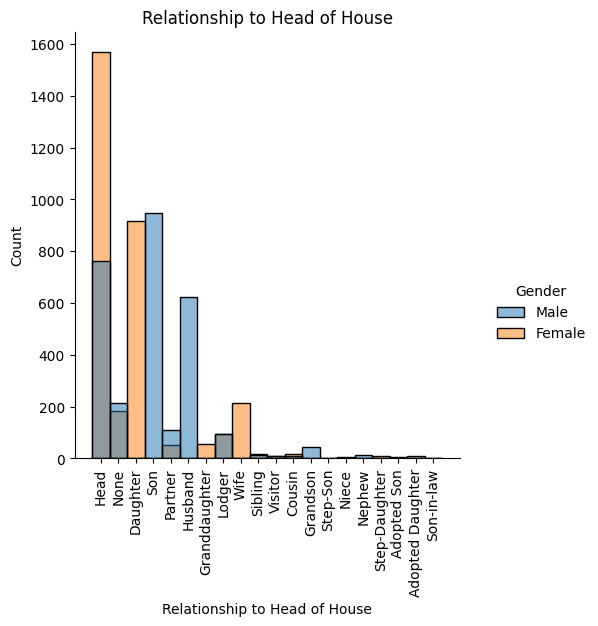

In [84]:
rel_to_head_of_house=sns.displot(census_data, x='Relationship to Head of House', hue= 'Gender')
rel_to_head_of_house.set_xticklabels(rotation=90)
rel_to_head_of_house.figure.savefig("rel_to_head_of_house.png", dpi=200, bbox_inches='tight')
plt.title('Relationship to Head of House')
plt.show()

## Gender Column

In [85]:
census_data['Gender'].replace(' ', np.nan, inplace=True)

In [86]:
census_data.loc[census_data['Gender'].isna()]

,House Number,Street,First Name,Surname,Age,Age Grade,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


In [87]:
census_data['Gender'].unique()

array(['Male', 'Female'], dtype=object)

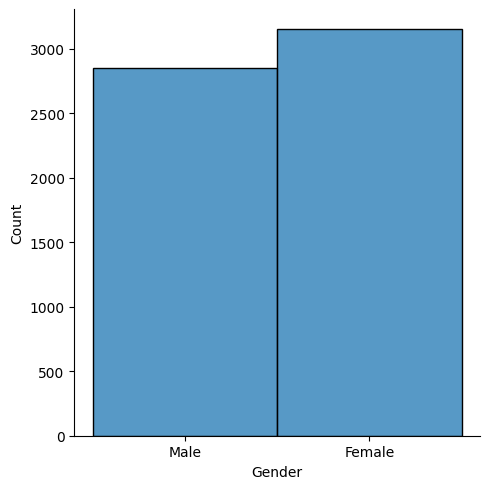

In [88]:
gender = sns.displot(census_data, x='Gender')
gender.figure.savefig("gender.png")


In [89]:
percentage_male = round(len(census_data[(census_data['Gender'] == 'Male')]) / len(census_data) * 100)

In [90]:
percentage_male

48

In [91]:
percentage_female = round(len(census_data[(census_data['Gender'] == 'Female')]) / len(census_data) * 100)

In [92]:
percentage_female

52

## Occupation Column

In [93]:
#
census_data['Occupation'].replace(' ', np.nan, inplace=True)

In [94]:
census_data.loc[census_data['Occupation'].isna()]

,House Number,Street,First Name,Surname,Age,Age Grade,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
2943,15,Middleton Prairie,Jenna,Burton,35,30-39,Head,Married,Female,NaN,None,Christian
3031,7,Collier Squares,Brandon,Blackburn,34,30-39,Husband,Married,Male,NaN,None,None


In [95]:
census_data['Occupation'].unique()

array(['Chief Technology Officer', 'Therapist, horticultural',
       'Records manager', ...,
       'Retired Scientist, product/process development',
       'Retired Designer, jewellery',
       'Retired Lecturer, higher education'], dtype=object)

In [96]:
census_data.loc[census_data['Occupation']== ' ']

,House Number,Street,First Name,Surname,Age,Age Grade,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


In [97]:
mode_occupation =census_data['Occupation'].mode()

In [98]:
mode_occupation

0    Student
Name: Occupation, dtype: object

In [99]:
census_data.loc[(census_data['Gender'] == 'Female') & (census_data['Age'].between(30,40))].mode()

,House Number,Street,First Name,Surname,Age,Age Grade,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
0,1.0,Evans Hills,Sara,Jones,34.0,30-39,Head,Single,Female,Unemployed,None,None
1,NaN,NaN,NaN,Smith,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [100]:
# the number of cells empty strings, so i filleed with the mode occupation with their age grade
census_data['Occupation'].fillna('Unemployed', inplace=True)

In [101]:
uni_phd_student = census_data.loc[(census_data['Occupation'] == 'PhD Student') | 
                                  (census_data['Occupation'] == 'University Student')]

In [102]:
uni_phd_student

,House Number,Street,First Name,Surname,Age,Age Grade,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
10,4,Cannon Street,Francis,Jones,18,10-19,Head,Single,Male,University Student,,Catholic
11,4,Cannon Street,Megan,Grant,19,10-19,None,Single,Female,University Student,None,None
12,4,Cannon Street,Barbara,Randall,19,10-19,None,Single,Female,University Student,None,Catholic
33,4,September Lake,Louise,Graham,22,20-29,Daughter,Divorced,Female,University Student,None,None
41,7,September Lake,Jacqueline,Jones,20,10-19,Head,Single,Female,University Student,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...
5953,1,Blue Granary,Sylvia,Pollard,19,10-19,Head,Single,Female,University Student,None,None
5955,1,Blue Granary,Gerald,Roberts,21,20-29,None,Single,Male,University Student,None,None
5959,1,Trawler Stables,Terence,Porter,19,10-19,Son,Divorced,Male,University Student,None,Catholic
5991,1,Column Manorhouse,Kenneth,Clarke,22,20-29,Son,Single,Male,University Student,None,Christian


In [103]:
potential_commuters=census_data.loc[census_data['Occupation'].str.contains('Sales|Engineer|Lecturer|Architect|Surveyor')]
potential_commuters

,House Number,Street,First Name,Surname,Age,Age Grade,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
26,2,September Lake,Terry,Myers,59,50-59,Lodger,Single,Male,"Engineer, petroleum",None,Christian
29,4,September Lake,Kyle,Graham,65,60-69,Husband,Married,Male,"Engineer, communications",None,None
54,2,Gill Heights,Jessica,Dunn,49,40-49,Head,Married,Female,"Engineer, mining",None,None
77,11,Gill Heights,Hayley,Kirk,26,20-29,Daughter,Single,Female,"Engineer, drilling",None,Christian
153,40,Gill Heights,Francesca,Bailey,44,40-49,Head,Single,Female,"Sales professional, IT",None,None
...,...,...,...,...,...,...,...,...,...,...,...,...
5941,1,Bradford Cottage,Timothy,Barker,43,40-49,Lodger,Divorced,Male,"Engineer, technical sales",None,Christian
5954,1,Blue Granary,Jacqueline,Adams,28,20-29,None,Single,Female,"Engineer, materials",None,Christian
5963,1,Ryan Spire,Patricia,Morgan,69,60-69,Head,Married,Female,"Retired Lecturer, higher education",None,None
5967,1,Ryan Spire,Nathan,Morgan,35,30-39,Son,Divorced,Male,Architectural technologist,None,None


In [104]:
# Getting the total number of the population
population_count = len(census_data)

In [105]:
# percentage of uni and phd students
percentage_of_uni_phd_students = ((len(uni_phd_student)) / (population_count)) * 100

In [106]:
percentage_of_uni_phd_students

7.216666666666667

In [107]:
census_data['Occupation'].value_counts()

Student                                    1039
University Student                          416
Unemployed                                  375
Child                                       321
PhD Student                                  17
                                           ... 
Retired Copywriter, advertising               1
Retired Theatre manager                       1
Retired Designer, ceramics/pottery            1
Retired Geophysicist/field seismologist       1
Retired Lecturer, higher education            1
Name: Occupation, Length: 1014, dtype: int64

In [108]:
# Code validation
census_data['Occupation'].isnull().sum()

0

In [109]:
# getting the university students
uni_students = census_data.loc[(census_data['Occupation'] == 'University Student')]

In [110]:
#code validation
uni_students

,House Number,Street,First Name,Surname,Age,Age Grade,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
10,4,Cannon Street,Francis,Jones,18,10-19,Head,Single,Male,University Student,,Catholic
11,4,Cannon Street,Megan,Grant,19,10-19,None,Single,Female,University Student,None,None
12,4,Cannon Street,Barbara,Randall,19,10-19,None,Single,Female,University Student,None,Catholic
33,4,September Lake,Louise,Graham,22,20-29,Daughter,Divorced,Female,University Student,None,None
41,7,September Lake,Jacqueline,Jones,20,10-19,Head,Single,Female,University Student,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...
5953,1,Blue Granary,Sylvia,Pollard,19,10-19,Head,Single,Female,University Student,None,None
5955,1,Blue Granary,Gerald,Roberts,21,20-29,None,Single,Male,University Student,None,None
5959,1,Trawler Stables,Terence,Porter,19,10-19,Son,Divorced,Male,University Student,None,Catholic
5991,1,Column Manorhouse,Kenneth,Clarke,22,20-29,Son,Single,Male,University Student,None,Christian


In [111]:
# getting the students from the population
students = census_data.loc[census_data['Occupation'] == 'Student']

In [112]:
#code validation
students

,House Number,Street,First Name,Surname,Age,Age Grade,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
6,3,Cannon Street,Julie,Brown,16,10-19,Daughter,NaN,Female,Student,None,NaN
7,3,Cannon Street,Katie,Brown,14,10-19,Daughter,NaN,Female,Student,None,NaN
8,3,Cannon Street,Simon,Brown,11,10-19,Son,NaN,Male,Student,None,NaN
9,3,Cannon Street,Chelsea,Brown,11,10-19,Daughter,NaN,Female,Student,None,NaN
16,5,Cannon Street,Ashleigh,Bird,9,0-9,Daughter,NaN,Female,Student,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
5979,1,Hereford Ranch,Joe,Lee,14,10-19,Son,NaN,Male,Student,None,NaN
5980,1,Hereford Ranch,Steven,Lee,11,10-19,Son,NaN,Male,Student,None,NaN
5981,1,Hereford Ranch,Shane,Lee,10,0-9,Son,NaN,Male,Student,None,NaN
5982,1,Hereford Ranch,Hollie,Lee,6,0-9,Daughter,NaN,Female,Student,None,NaN


In [113]:
# getting the unemployed from the population
unemployed = census_data.loc[census_data['Occupation'] == 'Unemployed']

In [114]:
#code validation
unemployed

,House Number,Street,First Name,Surname,Age,Age Grade,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
43,8,September Lake,Alison,Johnson,38,30-39,Head,Single,Female,Unemployed,None,None
52,1,Gill Heights,Jill,Kaur,39,30-39,Head,Widowed,Female,Unemployed,None,Methodist
59,3,Gill Heights,Nicola,Lewis,30,20-29,Head,Widowed,Female,Unemployed,None,None
67,7,Gill Heights,Karen,Warren,56,50-59,Head,Single,Female,Unemployed,None,Christian
75,11,Gill Heights,Katherine,Kirk,64,60-69,Head,Married,Female,Unemployed,None,Christian
...,...,...,...,...,...,...,...,...,...,...,...,...
5956,1,Blue Granary,Sara,Evans,36,30-39,None,Single,Female,Unemployed,None,Christian
5958,1,Trawler Stables,Gail,Porter,46,40-49,Head,Divorced,Female,Unemployed,None,Catholic
5972,1,Clarke Ranch,Terence,Clark,50,40-49,Husband,Married,Male,Unemployed,None,Christian
5983,1,Column Manorhouse,Hazel,Clarke,58,50-59,Head,Divorced,Female,Unemployed,None,Christian


In [115]:
#converting all the retired occupation category to retired 
census_data.loc[census_data['Occupation'].str.startswith('Retired'), 'Occupation'] = 'Retired'

In [116]:
# getting the retired in the population
retired = census_data.loc[census_data['Occupation'] == 'Retired']

In [117]:
#code validation
retired

,House Number,Street,First Name,Surname,Age,Age Grade,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
48,9,September Lake,Marie,Wilkinson,95,90-99,Head,Married,Female,Retired,None,Christian
49,9,September Lake,Joseph,Wilkinson,97,90-99,Husband,Married,Male,Retired,None,Christian
93,16,Gill Heights,Maria,Clarke,74,70-79,Head,Married,Female,Retired,None,Christian
94,16,Gill Heights,Ben,Clarke,78,70-79,Husband,Married,Male,Retired,None,Christian
112,26,Gill Heights,Rosie,Brown,72,70-79,Head,Widowed,Female,Retired,None,Methodist
...,...,...,...,...,...,...,...,...,...,...,...,...
5885,14,Fisher Lane,Robin,Rice,68,60-69,Head,Widowed,Male,Retired,None,None
5889,16,Fisher Lane,Emma,Randall,73,70-79,Head,Widowed,Female,Retired,None,Christian
5892,19,Fisher Lane,Jamie,Wright,88,80-89,Head,Divorced,Male,Retired,None,None
5963,1,Ryan Spire,Patricia,Morgan,69,60-69,Head,Married,Female,Retired,None,None


In [118]:
#checking for retired below the stated retirement age
census_data.loc[(census_data['Occupation'] == 'Retired') & (census_data['Age'] <= 65)]

,House Number,Street,First Name,Surname,Age,Age Grade,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


In [119]:
census_data.loc[census_data['Occupation'] == 'Child']

,House Number,Street,First Name,Surname,Age,Age Grade,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
19,6,Cannon Street,Yvonne,Roberts,1,0-9,Granddaughter,NaN,Female,Child,None,NaN
25,2,September Lake,Samantha,Bradshaw,2,0-9,Daughter,NaN,Female,Child,None,NaN
39,6,September Lake,Kieran,Davies,3,0-9,Son,NaN,Male,Child,None,NaN
40,6,September Lake,Eileen,Davies,1,0-9,Daughter,NaN,Female,Child,None,NaN
44,8,September Lake,Connor,Johnson,0,0-9,Son,NaN,Male,Child,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
5928,1,CherryChestnut Fortress,Nicola,Moore,0,0-9,Daughter,NaN,Female,Child,None,NaN
5932,1,Bradford Cottage,Ross,Chandler,3,0-9,Son,NaN,Male,Child,None,NaN
5933,1,Bradford Cottage,Sarah,Chandler,2,0-9,Daughter,NaN,Female,Child,None,NaN
5997,1,Guinevere Cottage,Tony,Payne,2,0-9,Son,NaN,Male,Child,None,NaN


In [120]:
census_data.loc[(census_data['Occupation'] == 'Child') & (census_data['Age'] >= 4)]

,House Number,Street,First Name,Surname,Age,Age Grade,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
60,3,Gill Heights,Douglas,Lewis,4,0-9,Son,NaN,Male,Child,None,NaN
124,31,Gill Heights,Allan,Harrison,4,0-9,Son,NaN,Male,Child,None,NaN
300,39,Musictill Drive,Paige,Jones,4,0-9,Daughter,NaN,Female,Child,None,NaN
328,47,Musictill Drive,Clare,Wood,4,0-9,Daughter,NaN,Female,Child,None,NaN
429,3,Ripon Port,Toby,King,4,0-9,Son,NaN,Male,Child,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
5159,19,Horselink Street,Jonathan,Watson,4,0-9,Son,NaN,Male,Child,None,NaN
5202,19,Evans Road,Kate,Owen-Lynch,4,0-9,Granddaughter,NaN,Female,Child,None,NaN
5203,19,Evans Road,Vincent,Adams-Owen-Lynch,4,0-9,Grandson,NaN,Male,Child,None,NaN
5853,27,Davidson Crescent,Gordon,Connor-Andrews,4,0-9,Son,NaN,Male,Child,None,NaN


In [121]:
census_data.loc[(census_data['Occupation'] != 'Child') & 
                (census_data['Occupation'] != 'Retired') & 
                (census_data['Occupation'] != 'Unemployed') & 
                (census_data['Occupation'] != 'Student') & 
                (census_data['Occupation'] != 'University Student') & 
                (census_data['Occupation'] != 'PhD Student')]

,House Number,Street,First Name,Surname,Age,Age Grade,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
0,1,Cannon Street,Steven,Webster,45,40-49,Head,Single,Male,Chief Technology Officer,None,None
1,1,Cannon Street,Wayne,Perkins,39,30-39,None,Single,Male,"Therapist, horticultural",None,None
2,1,Cannon Street,Garry,O'Sullivan,43,40-49,None,Single,Male,Records manager,None,Methodist
3,1,Cannon Street,Jenna,Herbert,62,60-69,None,Single,Female,Outdoor activities/education manager,None,None
4,2,Cannon Street,Katy,Johnson,48,40-49,Head,Single,Female,"Loss adjuster, chartered",None,None
...,...,...,...,...,...,...,...,...,...,...,...,...
5989,1,Column Manorhouse,Geoffrey,Clarke,24,20-29,Son,Divorced,Male,Sports coach,None,None
5990,1,Column Manorhouse,Donna,Clarke,24,20-29,Daughter,Divorced,Female,"Administrator, arts",None,Christian
5995,1,Guinevere Cottage,Emily,Payne,30,20-29,Head,Married,Female,Associate Professor,None,None
5996,1,Guinevere Cottage,Jeffrey,Payne,36,30-39,Husband,Married,Male,English as a second language teacher,None,None


In [122]:
sorted(census_data['Occupation'].unique())

['Academic librarian',
 'Accommodation manager',
 'Accountant, chartered',
 'Accountant, chartered certified',
 'Accountant, chartered management',
 'Accountant, chartered public finance',
 'Accounting technician',
 'Actor',
 'Actuary',
 'Acupuncturist',
 'Administrator',
 'Administrator, Civil Service',
 'Administrator, arts',
 'Administrator, charities/voluntary organisations',
 'Administrator, education',
 'Administrator, local government',
 'Administrator, sports',
 'Adult guidance worker',
 'Adult nurse',
 'Advertising account executive',
 'Advertising account planner',
 'Advertising art director',
 'Advertising copywriter',
 'Advice worker',
 'Aeronautical engineer',
 'Agricultural consultant',
 'Agricultural engineer',
 'Aid worker',
 'Air broker',
 'Air cabin crew',
 'Air traffic controller',
 'Airline pilot',
 'Ambulance person',
 'Amenity horticulturist',
 'Analytical chemist',
 'Animal nutritionist',
 'Animal technologist',
 'Animator',
 'Applications developer',
 'Arboricul

In [123]:
census_data['Occupation'].value_counts()[:50].sort_values(ascending=False)

Student                                   1039
Retired                                    554
University Student                         416
Unemployed                                 375
Child                                      321
PhD Student                                 17
Museum education officer                    14
Patent examiner                             13
Trading standards officer                   12
Surveyor, building                          12
Jewellery designer                          12
Therapist, art                              12
Clothing/textile technologist               11
Therapist, drama                            11
Exhibitions officer, museum/gallery         11
Designer, interior/spatial                  11
Product manager                             11
Planning and development surveyor           10
Occupational psychologist                   10
Designer, fashion/clothing                  10
IT trainer                                  10
Engineer, com

In [124]:
census_data['Occupation Category'] = census_data['Occupation']

In [125]:
census_data.loc[~census_data['Occupation Category'].str.contains('PhD Student|University Student|Student|Retired|Child|Unemployed'), 
                'Occupation Category'] = 'Employed'

In [126]:
census_data.loc[census_data['Occupation Category'] == 'Employed']

,House Number,Street,First Name,Surname,Age,Age Grade,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Occupation Category
0,1,Cannon Street,Steven,Webster,45,40-49,Head,Single,Male,Chief Technology Officer,None,None,Employed
1,1,Cannon Street,Wayne,Perkins,39,30-39,None,Single,Male,"Therapist, horticultural",None,None,Employed
2,1,Cannon Street,Garry,O'Sullivan,43,40-49,None,Single,Male,Records manager,None,Methodist,Employed
3,1,Cannon Street,Jenna,Herbert,62,60-69,None,Single,Female,Outdoor activities/education manager,None,None,Employed
4,2,Cannon Street,Katy,Johnson,48,40-49,Head,Single,Female,"Loss adjuster, chartered",None,None,Employed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5989,1,Column Manorhouse,Geoffrey,Clarke,24,20-29,Son,Divorced,Male,Sports coach,None,None,Employed
5990,1,Column Manorhouse,Donna,Clarke,24,20-29,Daughter,Divorced,Female,"Administrator, arts",None,Christian,Employed
5995,1,Guinevere Cottage,Emily,Payne,30,20-29,Head,Married,Female,Associate Professor,None,None,Employed
5996,1,Guinevere Cottage,Jeffrey,Payne,36,30-39,Husband,Married,Male,English as a second language teacher,None,None,Employed


In [127]:
# replaciing the the 65 years and above unemployed with retired
census_data.loc[(census_data['Occupation'] == 'Unemployed') & 
            (census_data['Age'] >= 65)].replace('Unemployed', 'Retired')

,House Number,Street,First Name,Surname,Age,Age Grade,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Occupation Category
659,39,Parry Crescent,Marian,Hurst,83,80-89,Head,Widowed,Female,Retired,None,Methodist,Retired
728,54,Parry Crescent,Francesca,Sullivan,67,60-69,Head,Widowed,Female,Retired,None,Christian,Retired
1089,5,Pigeonpound Lane,Chelsea,Walker,68,60-69,Head,Divorced,Female,Retired,None,None,Retired
1250,9,Price Locks,Stanley,Green,66,60-69,Husband,Married,Male,Retired,None,None,Retired
1328,2,Lichfieldcharm Drive,Reece,Hamilton,65,60-69,Husband,Married,Male,Retired,None,Christian,Retired
1461,75,Jones Cape,Tom,Wheeler,75,70-79,Head,Widowed,Male,Retired,None,Christian,Retired
1553,133,Jones Cape,Lee,Webb,76,70-79,Head,Widowed,Male,Retired,None,Christian,Retired
1621,3,Powell Coves,Kate,Page,71,70-79,Head,Widowed,Female,Retired,None,Christian,Retired
1688,2,Hall Loop,Shirley,Kelly,65,60-69,Head,Divorced,Female,Retired,None,Catholic,Retired
1846,60,Jones Avenue,Damian,Nicholls,68,60-69,Head,Single,Male,Retired,None,Catholic,Retired


In [128]:
census_data['Occupation Category'].unique()

array(['Employed', 'Student', 'University Student', 'Child', 'Unemployed',
       'Retired', 'PhD Student', 'Child psychotherapist'], dtype=object)

<Axes: >

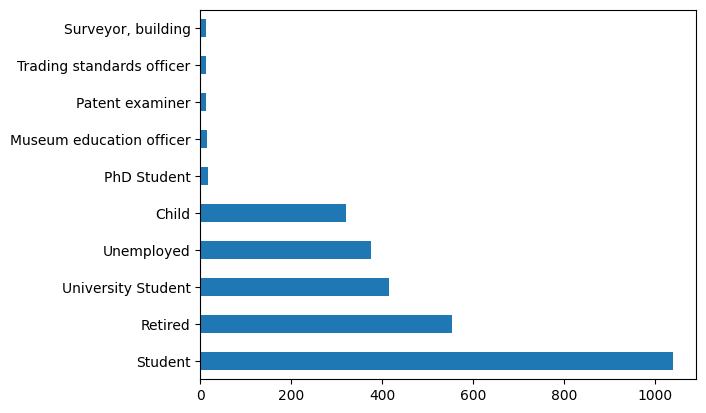

In [129]:
census_data['Occupation'].value_counts()[:10].sort_values(ascending=False).plot(kind='barh')

### Occupation plots

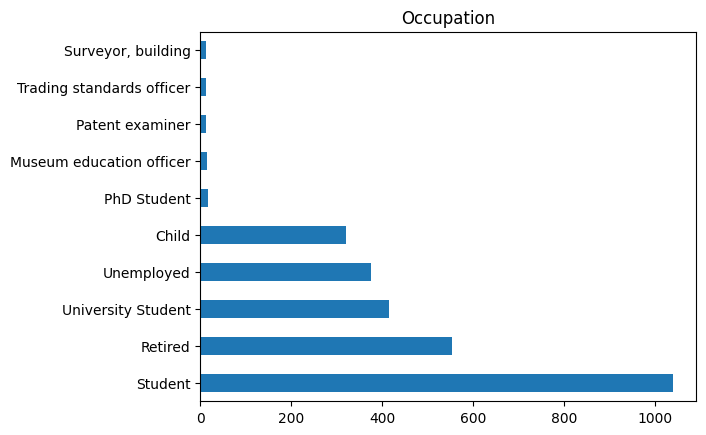

In [130]:
occupation= census_data['Occupation'].value_counts().head(10).plot(kind='barh')
occupation.figure.savefig("occupation.png", dpi=200, bbox_inches='tight')
plt.title('Occupation')
plt.show()

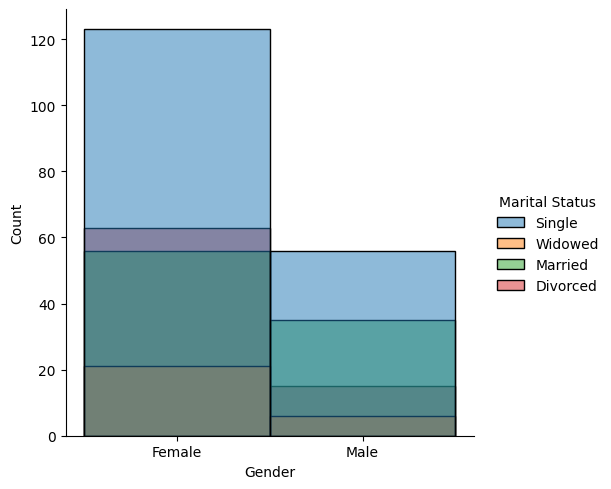

In [131]:
sns.displot(unemployed, x='Gender', hue='Marital Status')
plt.show()

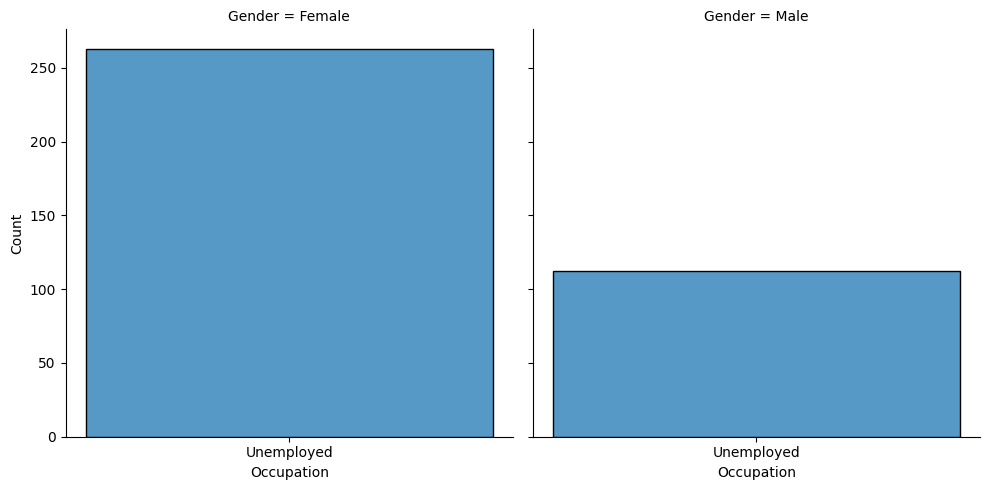

In [132]:
occupation_gender = sns.displot(unemployed, x='Occupation', col='Gender')
occupation_gender.figure.savefig("occupation_gender.png")

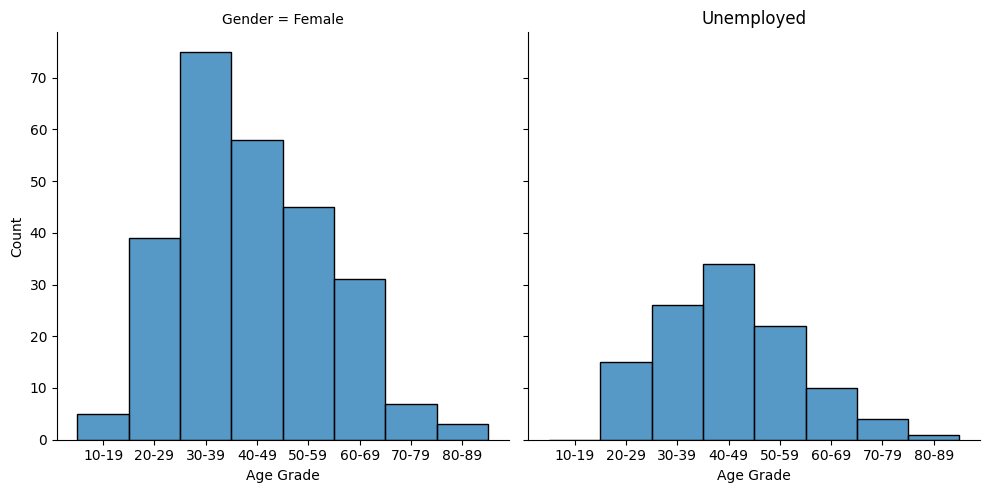

In [133]:
unemployed_gender = sns.displot(unemployed, x='Age Grade', col='Gender')
unemployed_gender.figure.savefig("unemployed_gender.png", dpi=200, bbox_inches='tight')
plt.title('Unemployed')
plt.show()

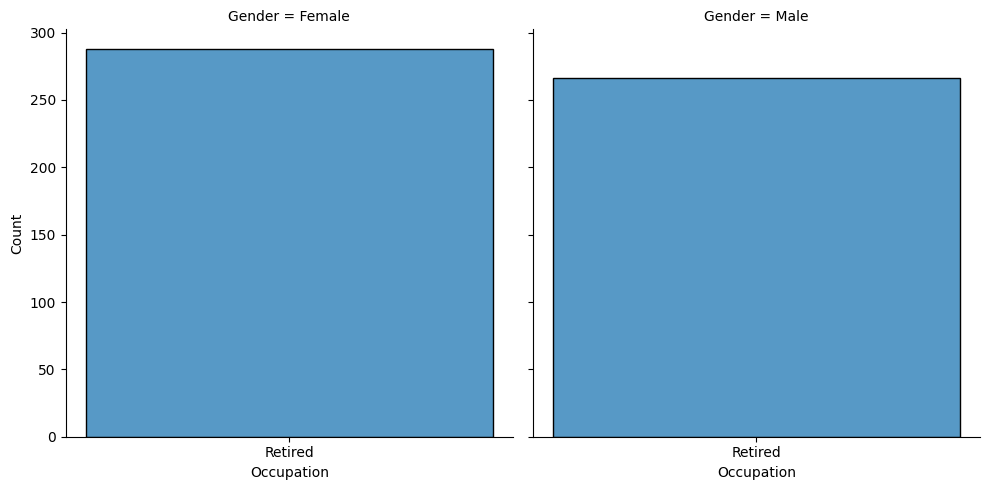

In [134]:
occupation_gender = sns.displot(retired, x='Occupation', col='Gender')

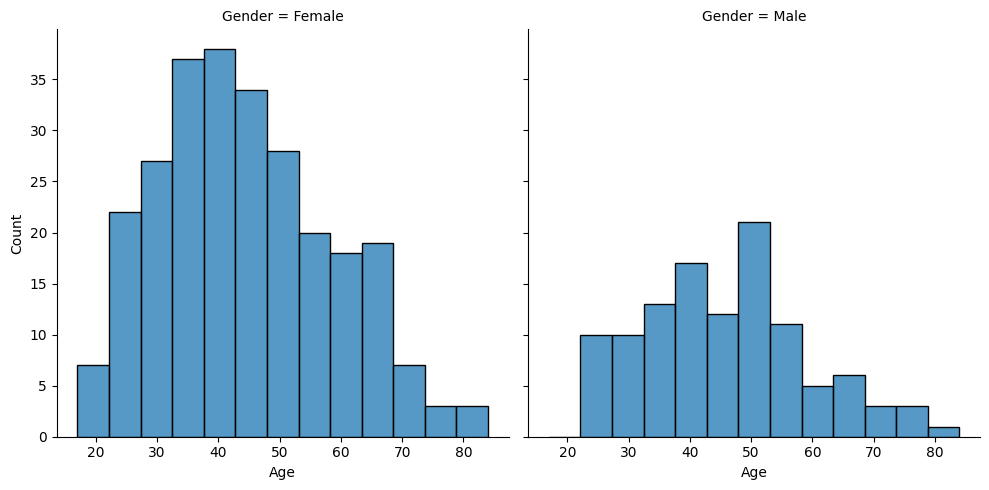

In [135]:
unemployed_gender = sns.displot(unemployed, x='Age', col='Gender')

## Infirmity Column

In [136]:
census_data['Infirmity'].replace(' ', np.nan, inplace=True)

In [137]:
census_data['Infirmity'].isna().sum()

9

In [138]:
census_data['Infirmity'].fillna('None', inplace=True)

In [139]:
# Code validation
census_data['Infirmity'].isnull().sum()

0

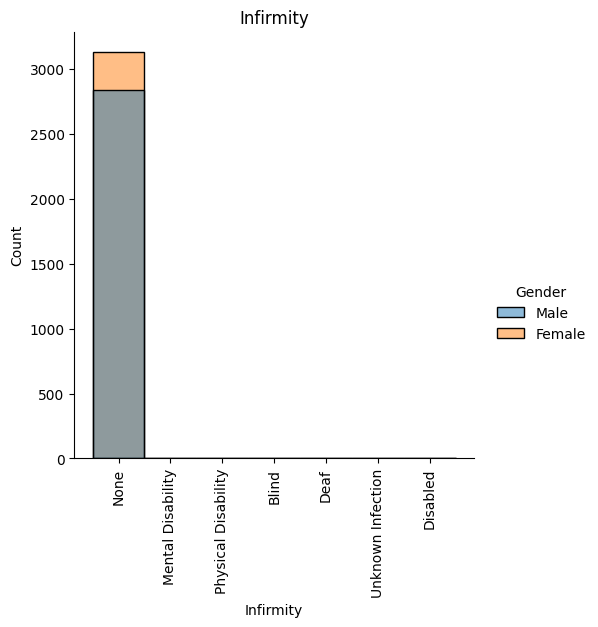

In [140]:
%matplotlib inline
infirmity=sns.displot(census_data, x='Infirmity', hue='Gender', binwidth=2)
infirmity.set_xticklabels(rotation=90)
infirmity.figure.savefig("infirmity.png", dpi=200, bbox_inches='tight')
plt.title('Infirmity')
plt.show()


## Marital Status Column

In [141]:
# Check for unique entries
census_data['Marital Status'].unique()

array(['Single', nan, 'Divorced', 'Married', 'Widowed'], dtype=object)

In [142]:
census_data.loc[census_data["Marital Status"].isna()]

,House Number,Street,First Name,Surname,Age,Age Grade,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Occupation Category
6,3,Cannon Street,Julie,Brown,16,10-19,Daughter,NaN,Female,Student,None,NaN,Student
7,3,Cannon Street,Katie,Brown,14,10-19,Daughter,NaN,Female,Student,None,NaN,Student
8,3,Cannon Street,Simon,Brown,11,10-19,Son,NaN,Male,Student,None,NaN,Student
9,3,Cannon Street,Chelsea,Brown,11,10-19,Daughter,NaN,Female,Student,None,NaN,Student
16,5,Cannon Street,Ashleigh,Bird,9,0-9,Daughter,NaN,Female,Student,None,NaN,Student
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5981,1,Hereford Ranch,Shane,Lee,10,0-9,Son,NaN,Male,Student,None,NaN,Student
5982,1,Hereford Ranch,Hollie,Lee,6,0-9,Daughter,NaN,Female,Student,None,NaN,Student
5994,1,Column Manorhouse,Timothy,Clarke,16,10-19,Son,NaN,Male,Student,None,NaN,Student
5997,1,Guinevere Cottage,Tony,Payne,2,0-9,Son,NaN,Male,Child,None,NaN,Child


In [143]:
census_data.loc[(census_data["Marital Status"].isnull()) & (census_data["Age"] < 16)]

,House Number,Street,First Name,Surname,Age,Age Grade,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Occupation Category
7,3,Cannon Street,Katie,Brown,14,10-19,Daughter,NaN,Female,Student,None,NaN,Student
8,3,Cannon Street,Simon,Brown,11,10-19,Son,NaN,Male,Student,None,NaN,Student
9,3,Cannon Street,Chelsea,Brown,11,10-19,Daughter,NaN,Female,Student,None,NaN,Student
16,5,Cannon Street,Ashleigh,Bird,9,0-9,Daughter,NaN,Female,Student,None,NaN,Student
19,6,Cannon Street,Yvonne,Roberts,1,0-9,Granddaughter,NaN,Female,Child,None,NaN,Child
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5980,1,Hereford Ranch,Steven,Lee,11,10-19,Son,NaN,Male,Student,None,NaN,Student
5981,1,Hereford Ranch,Shane,Lee,10,0-9,Son,NaN,Male,Student,None,NaN,Student
5982,1,Hereford Ranch,Hollie,Lee,6,0-9,Daughter,NaN,Female,Student,None,NaN,Student
5997,1,Guinevere Cottage,Tony,Payne,2,0-9,Son,NaN,Male,Child,None,NaN,Child


In [144]:
census_data.loc[(census_data["Marital Status"].isnull()) & (census_data["Age"] >= 16)]

,House Number,Street,First Name,Surname,Age,Age Grade,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Occupation Category
6,3,Cannon Street,Julie,Brown,16,10-19,Daughter,NaN,Female,Student,None,NaN,Student
57,2,Gill Heights,Matthew,Dunn,16,10-19,Son,NaN,Male,Student,None,NaN,Student
187,52,Gill Heights,Anne,Green,17,10-19,Daughter,NaN,Female,Student,None,NaN,Student
256,24,Musictill Drive,Philip,Williams,16,10-19,Son,NaN,Male,Student,None,NaN,Student
282,32,Musictill Drive,Ryan,Saunders,16,10-19,Son,NaN,Male,Student,None,NaN,Student
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5845,24,Davidson Crescent,Ashleigh,Walsh,17,10-19,Granddaughter,NaN,Female,Student,None,NaN,Student
5888,15,Fisher Lane,Yvonne,Bird,17,10-19,Daughter,NaN,Female,Student,None,NaN,Student
5894,20,Fisher Lane,Nathan,Atkins,16,10-19,Nephew,NaN,Male,Student,None,NaN,Student
5919,1,Davies Cottage,Joan,Brooks,16,10-19,Daughter,NaN,Female,Student,None,NaN,Student


In [145]:
# replacing marital status for minors with not applicable
census_data.loc[(census_data["Marital Status"].isna()) & (census_data["Age"] < 16),:] = census_data.loc[(census_data["Marital Status"].isna()) & (census_data["Age"] < 16), : ].fillna(value={'Marital Status': 'Not_Applicable'})

In [146]:
census_data.loc[(census_data["Marital Status"].isnull()) & (census_data["Age"] < 16)]

,House Number,Street,First Name,Surname,Age,Age Grade,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Occupation Category


In [147]:
# Code validation
census_data.loc[census_data["Marital Status"] == 'Not_Applicable']

,House Number,Street,First Name,Surname,Age,Age Grade,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Occupation Category
7,3,Cannon Street,Katie,Brown,14,10-19,Daughter,Not_Applicable,Female,Student,None,NaN,Student
8,3,Cannon Street,Simon,Brown,11,10-19,Son,Not_Applicable,Male,Student,None,NaN,Student
9,3,Cannon Street,Chelsea,Brown,11,10-19,Daughter,Not_Applicable,Female,Student,None,NaN,Student
16,5,Cannon Street,Ashleigh,Bird,9,0-9,Daughter,Not_Applicable,Female,Student,None,NaN,Student
19,6,Cannon Street,Yvonne,Roberts,1,0-9,Granddaughter,Not_Applicable,Female,Child,None,NaN,Child
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5980,1,Hereford Ranch,Steven,Lee,11,10-19,Son,Not_Applicable,Male,Student,None,NaN,Student
5981,1,Hereford Ranch,Shane,Lee,10,0-9,Son,Not_Applicable,Male,Student,None,NaN,Student
5982,1,Hereford Ranch,Hollie,Lee,6,0-9,Daughter,Not_Applicable,Female,Student,None,NaN,Student
5997,1,Guinevere Cottage,Tony,Payne,2,0-9,Son,Not_Applicable,Male,Child,None,NaN,Child


In [148]:
# Checking other entries that are not minors with NaN values
census_data.loc[(census_data["Age"] == 16) & (census_data["Marital Status"] != 'Not_Applicable')]

,House Number,Street,First Name,Surname,Age,Age Grade,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Occupation Category
6,3,Cannon Street,Julie,Brown,16,10-19,Daughter,NaN,Female,Student,None,NaN,Student
57,2,Gill Heights,Matthew,Dunn,16,10-19,Son,NaN,Male,Student,None,NaN,Student
256,24,Musictill Drive,Philip,Williams,16,10-19,Son,NaN,Male,Student,None,NaN,Student
282,32,Musictill Drive,Ryan,Saunders,16,10-19,Son,NaN,Male,Student,None,NaN,Student
355,56,Musictill Drive,Gillian,Clarke,16,10-19,Daughter,NaN,Female,Student,None,NaN,Student
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5722,23,Earlram Lane,Jonathan,Wright,16,10-19,Nephew,NaN,Male,Student,None,NaN,Student
5822,14,Davidson Crescent,Norman,Harvey,16,10-19,Son,NaN,Male,Student,None,NaN,Student
5894,20,Fisher Lane,Nathan,Atkins,16,10-19,Nephew,NaN,Male,Student,None,NaN,Student
5919,1,Davies Cottage,Joan,Brooks,16,10-19,Daughter,NaN,Female,Student,None,NaN,Student


In [149]:
# replacing other entries that are not minors with Undeclared 
census_data.loc[(census_data["Marital Status"].isna()) & (census_data["Age"] >= 16),:] = census_data.loc[(census_data["Marital Status"].isna()) & (census_data["Age"] >= 16),:].fillna(value={'Marital Status': 'Undeclared'})

In [150]:
# code validation
census_data.loc[census_data["Marital Status"] == 'Undeclared']

,House Number,Street,First Name,Surname,Age,Age Grade,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Occupation Category
6,3,Cannon Street,Julie,Brown,16,10-19,Daughter,Undeclared,Female,Student,None,NaN,Student
57,2,Gill Heights,Matthew,Dunn,16,10-19,Son,Undeclared,Male,Student,None,NaN,Student
187,52,Gill Heights,Anne,Green,17,10-19,Daughter,Undeclared,Female,Student,None,NaN,Student
256,24,Musictill Drive,Philip,Williams,16,10-19,Son,Undeclared,Male,Student,None,NaN,Student
282,32,Musictill Drive,Ryan,Saunders,16,10-19,Son,Undeclared,Male,Student,None,NaN,Student
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5845,24,Davidson Crescent,Ashleigh,Walsh,17,10-19,Granddaughter,Undeclared,Female,Student,None,NaN,Student
5888,15,Fisher Lane,Yvonne,Bird,17,10-19,Daughter,Undeclared,Female,Student,None,NaN,Student
5894,20,Fisher Lane,Nathan,Atkins,16,10-19,Nephew,Undeclared,Male,Student,None,NaN,Student
5919,1,Davies Cottage,Joan,Brooks,16,10-19,Daughter,Undeclared,Female,Student,None,NaN,Student


In [151]:
# Code validation
census_data.loc[census_data["Marital Status"].isna()]

,House Number,Street,First Name,Surname,Age,Age Grade,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Occupation Category


In [152]:
# checking for unique values in marital status
census_data["Marital Status"].unique()

array(['Single', 'Undeclared', 'Not_Applicable', 'Divorced', 'Married',
       'Widowed'], dtype=object)

In [153]:
single = census_data.loc[census_data["Marital Status"] == 'Single']

In [154]:
single

,House Number,Street,First Name,Surname,Age,Age Grade,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Occupation Category
0,1,Cannon Street,Steven,Webster,45,40-49,Head,Single,Male,Chief Technology Officer,None,None,Employed
1,1,Cannon Street,Wayne,Perkins,39,30-39,None,Single,Male,"Therapist, horticultural",None,None,Employed
2,1,Cannon Street,Garry,O'Sullivan,43,40-49,None,Single,Male,Records manager,None,Methodist,Employed
3,1,Cannon Street,Jenna,Herbert,62,60-69,None,Single,Female,Outdoor activities/education manager,None,None,Employed
4,2,Cannon Street,Katy,Johnson,48,40-49,Head,Single,Female,"Loss adjuster, chartered",None,None,Employed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5986,1,Column Manorhouse,Katherine,Clarke,26,20-29,Daughter,Single,Female,Video editor,None,None,Employed
5987,1,Column Manorhouse,Neil,Clarke,25,20-29,Son,Single,Male,Operational investment banker,None,None,Employed
5991,1,Column Manorhouse,Kenneth,Clarke,22,20-29,Son,Single,Male,University Student,None,Christian,University Student
5992,1,Column Manorhouse,Katherine,Clarke,21,20-29,Daughter,Single,Female,Unemployed,None,Christian,Unemployed


In [155]:
census_data.loc[(census_data["Marital Status"] == 'Single') & (census_data["Age"] <= 50)]

,House Number,Street,First Name,Surname,Age,Age Grade,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Occupation Category
0,1,Cannon Street,Steven,Webster,45,40-49,Head,Single,Male,Chief Technology Officer,None,None,Employed
1,1,Cannon Street,Wayne,Perkins,39,30-39,None,Single,Male,"Therapist, horticultural",None,None,Employed
2,1,Cannon Street,Garry,O'Sullivan,43,40-49,None,Single,Male,Records manager,None,Methodist,Employed
4,2,Cannon Street,Katy,Johnson,48,40-49,Head,Single,Female,"Loss adjuster, chartered",None,None,Employed
5,3,Cannon Street,Grace,Brown,45,40-49,Head,Single,Female,"Designer, ceramics/pottery",None,Christian,Employed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5986,1,Column Manorhouse,Katherine,Clarke,26,20-29,Daughter,Single,Female,Video editor,None,None,Employed
5987,1,Column Manorhouse,Neil,Clarke,25,20-29,Son,Single,Male,Operational investment banker,None,None,Employed
5991,1,Column Manorhouse,Kenneth,Clarke,22,20-29,Son,Single,Male,University Student,None,Christian,University Student
5992,1,Column Manorhouse,Katherine,Clarke,21,20-29,Daughter,Single,Female,Unemployed,None,Christian,Unemployed


In [156]:
married = census_data.loc[census_data["Marital Status"] == 'Married']

In [157]:
married

,House Number,Street,First Name,Surname,Age,Age Grade,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Occupation Category
17,6,Cannon Street,Jodie,Perry,58,50-59,Head,Married,Female,Make,None,Christian,Employed
18,6,Cannon Street,Kieran,Perry,59,50-59,Husband,Married,Male,Sports therapist,None,None,Employed
28,4,September Lake,Wendy,Graham,65,60-69,Head,Married,Female,IT trainer,None,Methodist,Employed
29,4,September Lake,Kyle,Graham,65,60-69,Husband,Married,Male,"Engineer, communications",None,None,Employed
37,6,September Lake,Victor,Murphy,47,40-49,Head,Married,Male,Merchant navy officer,None,None,Employed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5964,1,Ryan Spire,Timothy,Morgan,73,70-79,Husband,Married,Male,Retired,None,None,Retired
5971,1,Clarke Ranch,Rebecca,Clark,51,50-59,Head,Married,Female,"Programmer, multimedia",None,Christian,Employed
5972,1,Clarke Ranch,Terence,Clark,50,40-49,Husband,Married,Male,Unemployed,None,Christian,Unemployed
5995,1,Guinevere Cottage,Emily,Payne,30,20-29,Head,Married,Female,Associate Professor,None,None,Employed


In [158]:
married_male = census_data.loc[(census_data["Marital Status"] == 'Married') & (census_data["Gender"] == 'Male')]

In [159]:
# code validation
married_male

,House Number,Street,First Name,Surname,Age,Age Grade,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Occupation Category
18,6,Cannon Street,Kieran,Perry,59,50-59,Husband,Married,Male,Sports therapist,None,None,Employed
29,4,September Lake,Kyle,Graham,65,60-69,Husband,Married,Male,"Engineer, communications",None,None,Employed
37,6,September Lake,Victor,Murphy,47,40-49,Head,Married,Male,Merchant navy officer,None,None,Employed
49,9,September Lake,Joseph,Wilkinson,97,90-99,Husband,Married,Male,Retired,None,Christian,Retired
55,2,Gill Heights,Mathew,Dunn,51,50-59,Husband,Married,Male,"Psychologist, educational",None,None,Employed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5943,1,Lamb Warehouse,Louis,Pritchard,66,60-69,Head,Married,Male,"Therapist, drama",None,None,Employed
5949,1,King Obervatory,Toby,Clark,48,40-49,Husband,Married,Male,Hydrologist,None,None,Employed
5964,1,Ryan Spire,Timothy,Morgan,73,70-79,Husband,Married,Male,Retired,None,None,Retired
5972,1,Clarke Ranch,Terence,Clark,50,40-49,Husband,Married,Male,Unemployed,None,Christian,Unemployed


In [160]:
married_female = census_data.loc[(census_data["Marital Status"] == 'Married') & (census_data["Gender"] == 'Female')]

In [161]:
# code validation
married_female

,House Number,Street,First Name,Surname,Age,Age Grade,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Occupation Category
17,6,Cannon Street,Jodie,Perry,58,50-59,Head,Married,Female,Make,None,Christian,Employed
28,4,September Lake,Wendy,Graham,65,60-69,Head,Married,Female,IT trainer,None,Methodist,Employed
38,6,September Lake,Marion,Murphy,45,40-49,Wife,Married,Female,Agricultural engineer,None,None,Employed
48,9,September Lake,Marie,Wilkinson,95,90-99,Head,Married,Female,Retired,None,Christian,Retired
54,2,Gill Heights,Jessica,Dunn,49,40-49,Head,Married,Female,"Engineer, mining",None,None,Employed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5944,1,Lamb Warehouse,Rachael,Pritchard,64,60-69,Wife,Married,Female,"Social research officer, government",None,None,Employed
5948,1,King Obervatory,Jade,Clark,46,40-49,Head,Married,Female,"Horticulturist, amenity",None,None,Employed
5963,1,Ryan Spire,Patricia,Morgan,69,60-69,Head,Married,Female,Retired,None,None,Retired
5971,1,Clarke Ranch,Rebecca,Clark,51,50-59,Head,Married,Female,"Programmer, multimedia",None,Christian,Employed


In [162]:
divorced = census_data.loc[census_data["Marital Status"] == 'Divorced']

In [163]:
divorced

,House Number,Street,First Name,Surname,Age,Age Grade,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Occupation Category
15,5,Cannon Street,Marc,Bird,24,20-29,Son,Divorced,Male,Colour technologist,Mental Disability,None,Employed
21,1,September Lake,Kathleen,Carroll,48,40-49,Head,Divorced,Female,Barista,None,Christian,Employed
23,2,September Lake,Anne,Bradshaw,42,40-49,Head,Divorced,Female,Make,None,Catholic,Employed
27,3,September Lake,Ashleigh,Clark,67,60-69,Head,Divorced,Female,Operations geologist,None,Christian,Employed
30,4,September Lake,Adrian,Graham,36,30-39,Son,Divorced,Male,Race relations officer,None,Methodist,Employed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5983,1,Column Manorhouse,Hazel,Clarke,58,50-59,Head,Divorced,Female,Unemployed,None,Christian,Unemployed
5988,1,Column Manorhouse,Tina,Clarke,25,20-29,Daughter,Divorced,Female,"Research officer, political party",None,Christian,Employed
5989,1,Column Manorhouse,Geoffrey,Clarke,24,20-29,Son,Divorced,Male,Sports coach,None,None,Employed
5990,1,Column Manorhouse,Donna,Clarke,24,20-29,Daughter,Divorced,Female,"Administrator, arts",None,Christian,Employed


In [164]:
divorced_female = census_data.loc[(census_data["Marital Status"] == 'Divorced') & (census_data["Gender"] == 'Female')]

In [165]:
divorced_female

,House Number,Street,First Name,Surname,Age,Age Grade,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Occupation Category
21,1,September Lake,Kathleen,Carroll,48,40-49,Head,Divorced,Female,Barista,None,Christian,Employed
23,2,September Lake,Anne,Bradshaw,42,40-49,Head,Divorced,Female,Make,None,Catholic,Employed
27,3,September Lake,Ashleigh,Clark,67,60-69,Head,Divorced,Female,Operations geologist,None,Christian,Employed
33,4,September Lake,Louise,Graham,22,20-29,Daughter,Divorced,Female,University Student,None,None,University Student
78,11,Gill Heights,Stacey,Ali,23,20-29,Daughter,Divorced,Female,Production manager,None,Christian,Employed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5926,1,CherryChestnut Fortress,Julia,Moore,41,40-49,Head,Divorced,Female,Unemployed,None,Catholic,Unemployed
5958,1,Trawler Stables,Gail,Porter,46,40-49,Head,Divorced,Female,Unemployed,None,Catholic,Unemployed
5983,1,Column Manorhouse,Hazel,Clarke,58,50-59,Head,Divorced,Female,Unemployed,None,Christian,Unemployed
5988,1,Column Manorhouse,Tina,Clarke,25,20-29,Daughter,Divorced,Female,"Research officer, political party",None,Christian,Employed


In [166]:
divorced_male = census_data.loc[(census_data["Marital Status"] == 'Divorced') & (census_data["Gender"] == 'Male')]

In [167]:
divorced_male

,House Number,Street,First Name,Surname,Age,Age Grade,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Occupation Category
15,5,Cannon Street,Marc,Bird,24,20-29,Son,Divorced,Male,Colour technologist,Mental Disability,None,Employed
30,4,September Lake,Adrian,Graham,36,30-39,Son,Divorced,Male,Race relations officer,None,Methodist,Employed
68,7,Gill Heights,Terry,Hughes-Warren,37,30-39,Son,Divorced,Male,"Scientist, marine",None,Christian,Employed
81,12,Gill Heights,Conor,Jackson,18,10-19,Son,Divorced,Male,Student,None,Christian,Student
95,17,Gill Heights,Gerald,Hughes,49,40-49,Head,Divorced,Male,Planning and development surveyor,None,None,Employed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5951,1,King Obervatory,Frederick,Clark,26,20-29,Son,Divorced,Male,Banker,None,None,Employed
5959,1,Trawler Stables,Terence,Porter,19,10-19,Son,Divorced,Male,University Student,None,Catholic,University Student
5967,1,Ryan Spire,Nathan,Morgan,35,30-39,Son,Divorced,Male,Architectural technologist,None,None,Employed
5989,1,Column Manorhouse,Geoffrey,Clarke,24,20-29,Son,Divorced,Male,Sports coach,None,None,Employed


In [168]:
census_data.loc[(census_data["Marital Status"] == 'Divorced') & (census_data["Age"] <= 20) ]

,House Number,Street,First Name,Surname,Age,Age Grade,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Occupation Category
81,12,Gill Heights,Conor,Jackson,18,10-19,Son,Divorced,Male,Student,None,Christian,Student
285,33,Musictill Drive,Rachel,Hobbs,18,10-19,Daughter,Divorced,Female,Student,None,Christian,Student
318,45,Musictill Drive,Jasmine,Davis,19,10-19,Daughter,Divorced,Female,University Student,None,None,University Student
442,9,Ripon Port,Rachael,Hamilton,18,10-19,Lodger,Divorced,Female,Student,None,NaN,Student
552,7,Parry Crescent,Gerald,Patel,18,10-19,Son,Divorced,Male,Student,None,None,Student
929,35,Wessex Drive,Lawrence,Smith,18,10-19,Son,Divorced,Male,Student,None,None,Student
964,44,Wessex Drive,Jack,Holden,18,10-19,Son,Divorced,Male,Student,None,None,Student
1164,11,Violetloop Road,Dylan,Richardson,20,10-19,Son,Divorced,Male,Financial manager,None,Christian,Employed
1174,1,Davies Crescent,Sean,Martin,18,10-19,Son,Divorced,Male,Student,None,None,Student
1257,11,Price Locks,Heather,Walton,19,10-19,Daughter,Divorced,Female,University Student,None,Catholic,University Student


In [169]:
# Code validation
minors = census_data.loc[census_data["Marital Status"] == 'Not_Applicable']

In [170]:
minors

,House Number,Street,First Name,Surname,Age,Age Grade,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Occupation Category
7,3,Cannon Street,Katie,Brown,14,10-19,Daughter,Not_Applicable,Female,Student,None,NaN,Student
8,3,Cannon Street,Simon,Brown,11,10-19,Son,Not_Applicable,Male,Student,None,NaN,Student
9,3,Cannon Street,Chelsea,Brown,11,10-19,Daughter,Not_Applicable,Female,Student,None,NaN,Student
16,5,Cannon Street,Ashleigh,Bird,9,0-9,Daughter,Not_Applicable,Female,Student,None,NaN,Student
19,6,Cannon Street,Yvonne,Roberts,1,0-9,Granddaughter,Not_Applicable,Female,Child,None,NaN,Child
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5980,1,Hereford Ranch,Steven,Lee,11,10-19,Son,Not_Applicable,Male,Student,None,NaN,Student
5981,1,Hereford Ranch,Shane,Lee,10,0-9,Son,Not_Applicable,Male,Student,None,NaN,Student
5982,1,Hereford Ranch,Hollie,Lee,6,0-9,Daughter,Not_Applicable,Female,Student,None,NaN,Student
5997,1,Guinevere Cottage,Tony,Payne,2,0-9,Son,Not_Applicable,Male,Child,None,NaN,Child


In [171]:
census_data.loc[(census_data['Marital Status'] == 'Widowed') ]

,House Number,Street,First Name,Surname,Age,Age Grade,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Occupation Category
52,1,Gill Heights,Jill,Kaur,39,30-39,Head,Widowed,Female,Unemployed,None,Methodist,Unemployed
59,3,Gill Heights,Nicola,Lewis,30,20-29,Head,Widowed,Female,Unemployed,None,None,Unemployed
112,26,Gill Heights,Rosie,Brown,72,70-79,Head,Widowed,Female,Retired,None,Methodist,Retired
135,34,Gill Heights,Joe,Jarvis,55,50-59,Head,Widowed,Male,Unemployed,None,Christian,Unemployed
141,36,Gill Heights,Jodie,Watts,76,70-79,Head,Widowed,Female,Retired,None,Christian,Retired
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5835,21,Davidson Crescent,Duncan,Leach,66,60-69,Head,Widowed,Male,Restaurant manager,None,Christian,Employed
5842,24,Davidson Crescent,Alex,Warren,73,70-79,Head,Widowed,Male,Retired,None,Christian,Retired
5885,14,Fisher Lane,Robin,Rice,68,60-69,Head,Widowed,Male,Retired,None,None,Retired
5889,16,Fisher Lane,Emma,Randall,73,70-79,Head,Widowed,Female,Retired,None,Christian,Retired


In [172]:
married_rate= len(married)/ population_count * 1000
married_rate

280.6666666666667

In [173]:
divorced_rate= len(divorced)/ population_count * 1000
divorced_rate

97.0

In [174]:
# getting the married category per gender
married_status=married['Gender'].value_counts()
married_status

Female    845
Male      839
Name: Gender, dtype: int64

In [175]:
# getting the divorced category per gender
divorced_status=divorced['Gender'].value_counts()
divorced_status

Female    346
Male      236
Name: Gender, dtype: int64

In [176]:
married_divorced_percntage = round(582/1684*100,2)
married_divorced_percntage

34.56

In [177]:
ratio_married = 1684/100
ratio_married

16.84

In [178]:
ratio_divorced = 582/100
ratio_divorced

5.82

In [179]:
print(f'the married to divorced ratio is: {ratio_married} : {ratio_divorced}')

the married to divorced ratio is: 16.84 : 5.82


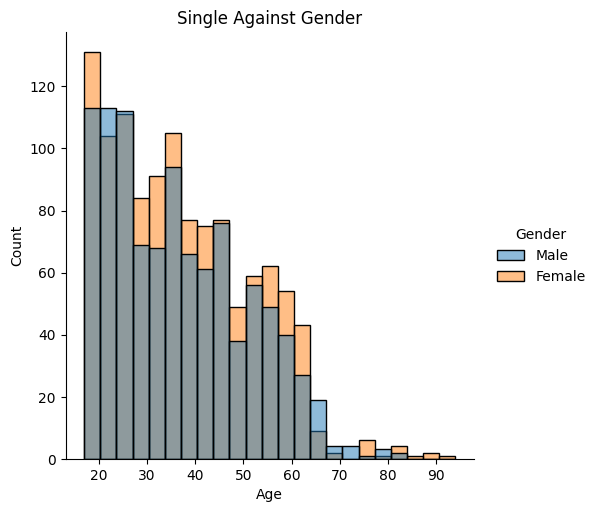

In [180]:
sns.displot(single, x= 'Age', hue='Gender')
plt.title('Single Against Gender')
plt.savefig('Single Against Age and Gender.png', dpi=200, bbox_inches='tight')
plt.show()

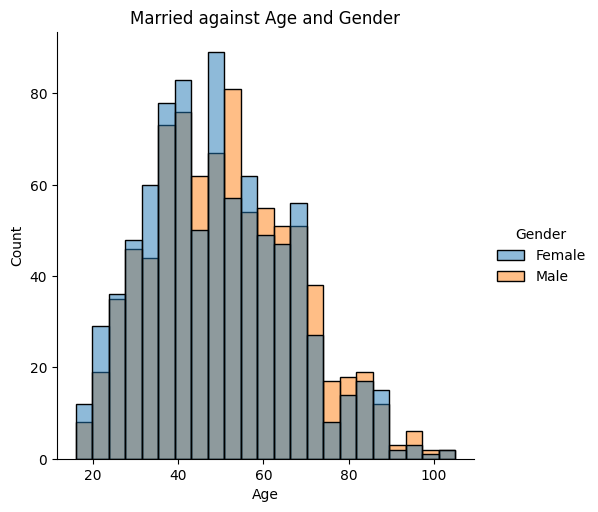

In [181]:
sns.displot(married, x = 'Age', hue = 'Gender').set(title='Married against Age and Gender')
plt.savefig('Married Against Age and Gender.png', dpi=200, bbox_inches='tight')
plt.show()

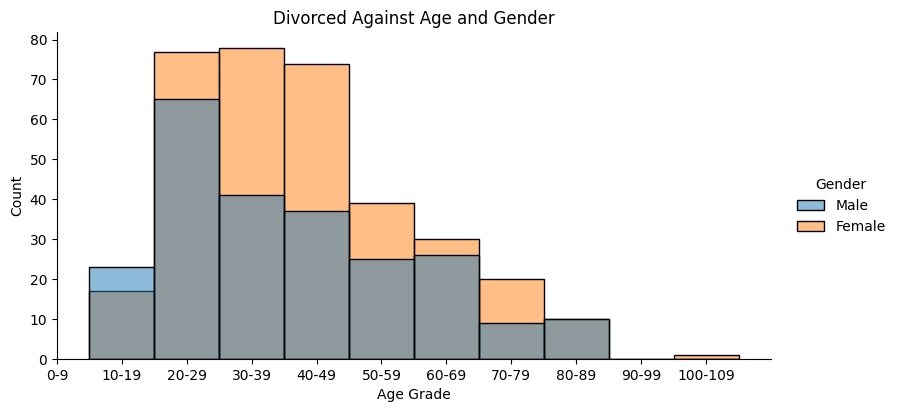

In [182]:
sns.displot(divorced, x = 'Age Grade', hue = 'Gender', aspect=2, height=4).set(title='Divorced Against Age and Gender')
plt.savefig('Divorced Against Age and Gender.png', dpi=200, bbox_inches='tight')
plt.show()

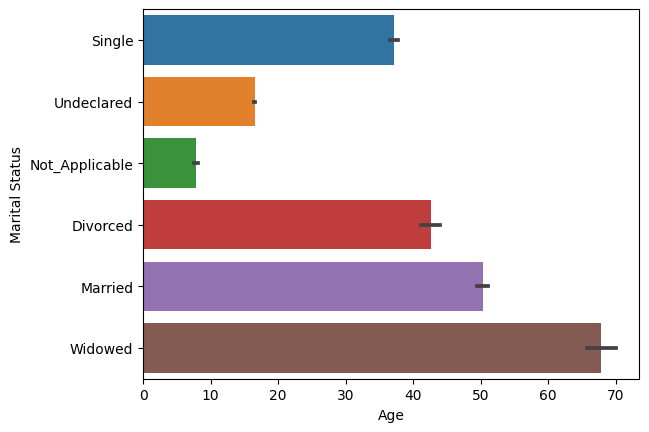

In [183]:
marital_status_age = sns.barplot(data=census_data, x='Age', y='Marital Status')
marital_status_age.figure.savefig("marital_status_age.png")

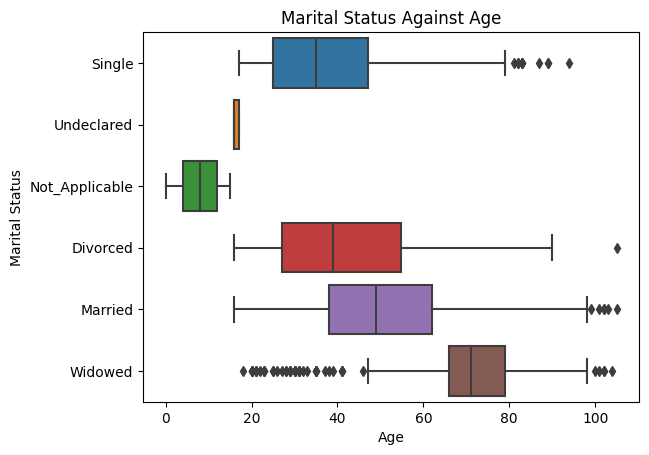

In [184]:
age_marital_status = sns.boxplot(data = census_data, y= 'Marital Status', x = 'Age')
age_marital_status.figure.savefig("age_marital_status.png")
plt.title('Marital Status Against Age')
plt.show()

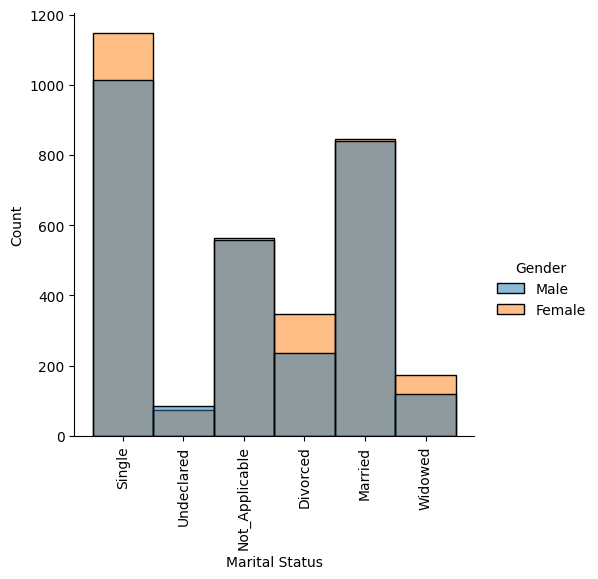

In [185]:
marital_status_gender = sns.displot(census_data, x='Marital Status', hue='Gender')
marital_status_gender.set_xticklabels(rotation=90)
# plt.title('marital status against gender')
marital_status_gender.savefig("marital_status_gender.png")
plt.show()

C:\Users\718547\AppData\Local\Temp\ipykernel_17772\1597879790.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(married, x='Gender', palette='set3')


<Axes: xlabel='Gender', ylabel='Count'>

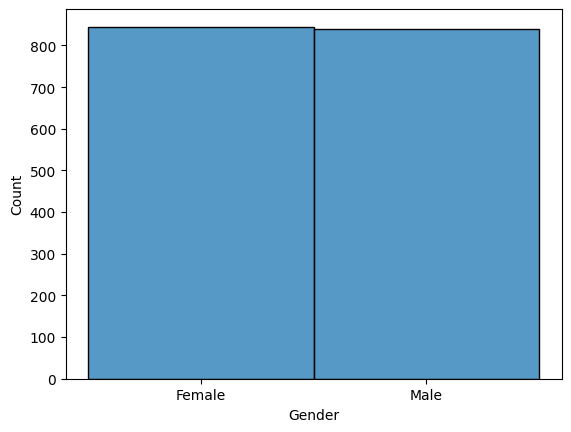

In [186]:
sns.histplot(married, x='Gender', palette='set3')

## Religion Column

In [187]:
census_data['Religion'].unique()

array(['None', 'Methodist', 'Christian', nan, 'Catholic', 'Muslim',
       'Jewish', 'Sikh', ' ', 'Orthodoxy', 'Baptist', 'Bahai', 'Private'],
      dtype=object)

In [190]:
census_data['Religion'].value_counts()

None         2106
Christian    1406
Catholic      620
Methodist     407
Muslim         87
Sikh           28
Jewish         18
                4
Private         2
Orthodoxy       1
Baptist         1
Bahai           1
Name: Religion, dtype: int64

In [191]:
census_data.loc[census_data['Religion'].isna()]

,House Number,Street,First Name,Surname,Age,Age Grade,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Occupation Category
6,3,Cannon Street,Julie,Brown,16,10-19,Daughter,Undeclared,Female,Student,None,NaN,Student
7,3,Cannon Street,Katie,Brown,14,10-19,Daughter,Not_Applicable,Female,Student,None,NaN,Student
8,3,Cannon Street,Simon,Brown,11,10-19,Son,Not_Applicable,Male,Student,None,NaN,Student
9,3,Cannon Street,Chelsea,Brown,11,10-19,Daughter,Not_Applicable,Female,Student,None,NaN,Student
16,5,Cannon Street,Ashleigh,Bird,9,0-9,Daughter,Not_Applicable,Female,Student,None,NaN,Student
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5981,1,Hereford Ranch,Shane,Lee,10,0-9,Son,Not_Applicable,Male,Student,None,NaN,Student
5982,1,Hereford Ranch,Hollie,Lee,6,0-9,Daughter,Not_Applicable,Female,Student,None,NaN,Student
5994,1,Column Manorhouse,Timothy,Clarke,16,10-19,Son,Undeclared,Male,Student,None,NaN,Student
5997,1,Guinevere Cottage,Tony,Payne,2,0-9,Son,Not_Applicable,Male,Child,None,NaN,Child


In [192]:
census_data.loc[(census_data['Age'] >= 16) & (census_data['Religion'].isnull()), : ] = census_data.loc[(census_data['Age'] >= 16) & (census_data['Religion'].isnull()), : ].fillna(value={'Religion':'Undeclared'})

In [193]:
census_data[(census_data['Age'] >= 16) & (census_data['Religion'].isna())]

,House Number,Street,First Name,Surname,Age,Age Grade,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Occupation Category


In [194]:
census_data.loc[(census_data['Age'] < 16) & (census_data['Religion'].isna())]

,House Number,Street,First Name,Surname,Age,Age Grade,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Occupation Category
7,3,Cannon Street,Katie,Brown,14,10-19,Daughter,Not_Applicable,Female,Student,None,NaN,Student
8,3,Cannon Street,Simon,Brown,11,10-19,Son,Not_Applicable,Male,Student,None,NaN,Student
9,3,Cannon Street,Chelsea,Brown,11,10-19,Daughter,Not_Applicable,Female,Student,None,NaN,Student
16,5,Cannon Street,Ashleigh,Bird,9,0-9,Daughter,Not_Applicable,Female,Student,None,NaN,Student
19,6,Cannon Street,Yvonne,Roberts,1,0-9,Granddaughter,Not_Applicable,Female,Child,None,NaN,Child
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5980,1,Hereford Ranch,Steven,Lee,11,10-19,Son,Not_Applicable,Male,Student,None,NaN,Student
5981,1,Hereford Ranch,Shane,Lee,10,0-9,Son,Not_Applicable,Male,Student,None,NaN,Student
5982,1,Hereford Ranch,Hollie,Lee,6,0-9,Daughter,Not_Applicable,Female,Student,None,NaN,Student
5997,1,Guinevere Cottage,Tony,Payne,2,0-9,Son,Not_Applicable,Male,Child,None,NaN,Child


In [195]:
census_data['Religion'] = census_data.groupby(['Surname','Street','House Number'])['Religion'].ffill()

In [196]:
census_data.loc[census_data['Religion'].isna()]

,House Number,Street,First Name,Surname,Age,Age Grade,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Occupation Category
19,6,Cannon Street,Yvonne,Roberts,1,0-9,Granddaughter,Not_Applicable,Female,Child,None,NaN,Child
39,6,September Lake,Kieran,Davies,3,0-9,Son,Not_Applicable,Male,Child,None,NaN,Child
40,6,September Lake,Eileen,Davies,1,0-9,Daughter,Not_Applicable,Female,Child,None,NaN,Child
96,17,Gill Heights,Laura,Campbell,0,0-9,Granddaughter,Not_Applicable,Female,Child,None,NaN,Child
110,25,Gill Heights,Catherine,Walton,8,0-9,Daughter,Not_Applicable,Female,Student,None,NaN,Student
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5899,23,Fisher Lane,Paula,Coleman,0,0-9,Granddaughter,Not_Applicable,Female,Child,None,NaN,Child
5932,1,Bradford Cottage,Ross,Chandler,3,0-9,Son,Not_Applicable,Male,Child,None,NaN,Child
5933,1,Bradford Cottage,Sarah,Chandler,2,0-9,Daughter,Not_Applicable,Female,Child,None,NaN,Child
5961,1,Trawler Stables,Roy,Jones,6,0-9,Son,Not_Applicable,Male,Student,None,NaN,Student


In [197]:
census_data['Religion'].unique()

array(['None', 'Methodist', 'Christian', 'Undeclared', 'Catholic', nan,
       'Muslim', 'Jewish', 'Sikh', ' ', 'Orthodoxy', 'Baptist', 'Bahai',
       'Private'], dtype=object)

In [198]:
census_data.loc[census_data['Religion'] == ' ']

,House Number,Street,First Name,Surname,Age,Age Grade,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Occupation Category
699,46,Parry Crescent,Teresa,Howell,42,40-49,None,Single,Female,Structural engineer,None,,Employed
2715,101,Evans Hills,Jacqueline,Hancock,73,70-79,Head,Divorced,Female,Retired,None,,Retired
3467,32,Gardner Crescent,Christian,Bennett,26,20-29,None,Single,Male,Archivist,None,,Employed
5683,3,Earlram Lane,Lindsey,Miah,25,20-29,Head,Married,Female,Biomedical scientist,None,,Employed


In [199]:
census_data['Religion'].replace(' ', 'Undeclared', inplace=True)

In [200]:
census_data.loc[census_data['Religion'].isna()]

,House Number,Street,First Name,Surname,Age,Age Grade,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Occupation Category
19,6,Cannon Street,Yvonne,Roberts,1,0-9,Granddaughter,Not_Applicable,Female,Child,None,NaN,Child
39,6,September Lake,Kieran,Davies,3,0-9,Son,Not_Applicable,Male,Child,None,NaN,Child
40,6,September Lake,Eileen,Davies,1,0-9,Daughter,Not_Applicable,Female,Child,None,NaN,Child
96,17,Gill Heights,Laura,Campbell,0,0-9,Granddaughter,Not_Applicable,Female,Child,None,NaN,Child
110,25,Gill Heights,Catherine,Walton,8,0-9,Daughter,Not_Applicable,Female,Student,None,NaN,Student
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5899,23,Fisher Lane,Paula,Coleman,0,0-9,Granddaughter,Not_Applicable,Female,Child,None,NaN,Child
5932,1,Bradford Cottage,Ross,Chandler,3,0-9,Son,Not_Applicable,Male,Child,None,NaN,Child
5933,1,Bradford Cottage,Sarah,Chandler,2,0-9,Daughter,Not_Applicable,Female,Child,None,NaN,Child
5961,1,Trawler Stables,Roy,Jones,6,0-9,Son,Not_Applicable,Male,Student,None,NaN,Student


In [201]:
census_data.iloc[15:25]

,House Number,Street,First Name,Surname,Age,Age Grade,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Occupation Category
15,5,Cannon Street,Marc,Bird,24,20-29,Son,Divorced,Male,Colour technologist,Mental Disability,None,Employed
16,5,Cannon Street,Ashleigh,Bird,9,0-9,Daughter,Not_Applicable,Female,Student,None,None,Student
17,6,Cannon Street,Jodie,Perry,58,50-59,Head,Married,Female,Make,None,Christian,Employed
18,6,Cannon Street,Kieran,Perry,59,50-59,Husband,Married,Male,Sports therapist,None,None,Employed
19,6,Cannon Street,Yvonne,Roberts,1,0-9,Granddaughter,Not_Applicable,Female,Child,None,NaN,Child
20,7,Cannon Street,NaN,Cross,34,30-39,Head,Single,Male,Speech and language therapist,None,Christian,Employed
21,1,September Lake,Kathleen,Carroll,48,40-49,Head,Divorced,Female,Barista,None,Christian,Employed
22,1,September Lake,Andrea,Carroll,25,20-29,Daughter,Single,Female,Clinical biochemist,None,None,Employed
23,2,September Lake,Anne,Bradshaw,42,40-49,Head,Divorced,Female,Make,None,Catholic,Employed
24,2,September Lake,Patricia,Bradshaw,6,0-9,Daughter,Not_Applicable,Female,Student,None,Catholic,Student


In [202]:
census_data.iloc[5959:5965]

,House Number,Street,First Name,Surname,Age,Age Grade,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Occupation Category
5959,1,Trawler Stables,Terence,Porter,19,10-19,Son,Divorced,Male,University Student,None,Catholic,University Student
5960,1,Trawler Stables,Ricky,Porter,14,10-19,Son,Not_Applicable,Male,Student,None,Catholic,Student
5961,1,Trawler Stables,Roy,Jones,6,0-9,Son,Not_Applicable,Male,Student,None,NaN,Student
5962,1,Trawler Stables,Kim,Jones,5,0-9,Daughter,Not_Applicable,Female,Student,None,NaN,Student
5963,1,Ryan Spire,Patricia,Morgan,69,60-69,Head,Married,Female,Retired,None,None,Retired
5964,1,Ryan Spire,Timothy,Morgan,73,70-79,Husband,Married,Male,Retired,None,None,Retired


In [203]:
census_data['Religion']=census_data.groupby(['Surname','Street','House Number','Relationship to Head of House'])['Religion'].ffill()

In [204]:
# Replacing all the Nan values with undeclared as they have no direct relative older to infer a religion
census_data['Religion'] = census_data['Religion'].fillna('Undeclared')

In [205]:
census_data['Religion'].unique()

array(['None', 'Methodist', 'Christian', 'Undeclared', 'Catholic',
       'Muslim', 'Jewish', 'Sikh', 'Orthodoxy', 'Baptist', 'Bahai',
       'Private'], dtype=object)

In [206]:
# Replacing the private religion to None
census_data['Religion']= census_data['Religion'].replace('Private', 'None')

In [207]:
# census_data.loc[census_data['Religion']== 'Sikh'].value_counts()
census_data['Religion'].value_counts()

None          2563
Christian     1590
Catholic       762
Methodist      488
Undeclared     436
Muslim          99
Sikh            33
Jewish          24
Orthodoxy        3
Baptist          1
Bahai            1
Name: Religion, dtype: int64

In [208]:
census_data.groupby('Religion')['Age'].median()

Religion
Bahai         22.0
Baptist       29.0
Catholic      38.0
Christian     48.0
Jewish        34.0
Methodist     38.0
Muslim        29.0
None          34.0
Orthodoxy      3.0
Sikh          24.0
Undeclared    15.0
Name: Age, dtype: float64

In [209]:
census_data['Religion'].unique()

array(['None', 'Methodist', 'Christian', 'Undeclared', 'Catholic',
       'Muslim', 'Jewish', 'Sikh', 'Orthodoxy', 'Baptist', 'Bahai'],
      dtype=object)

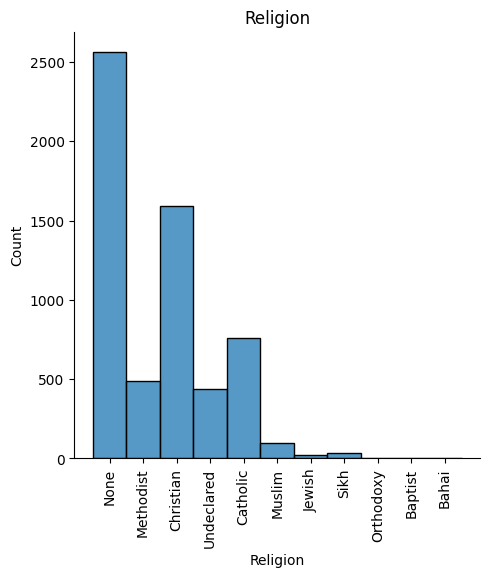

In [210]:
religion = sns.displot(census_data, x='Religion')
religion.set_xticklabels(rotation=90)
religion.savefig("religion.png")
plt.title('Religion')
plt.show()

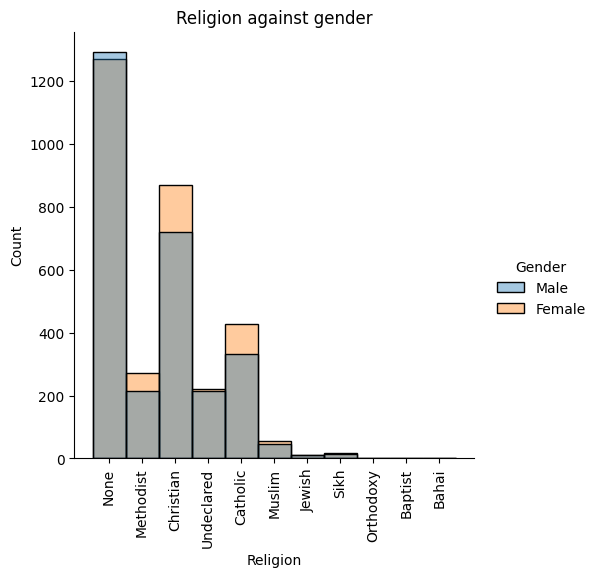

In [211]:
religion_gender = sns.displot(census_data, x='Religion', hue='Gender', alpha=0.4)
plt.title('Religion against gender')
religion_gender.set_xticklabels(rotation=90)
religion_gender.figure.savefig("religion_gender.png")
plt.show()

In [212]:
religion=census_data['Religion']

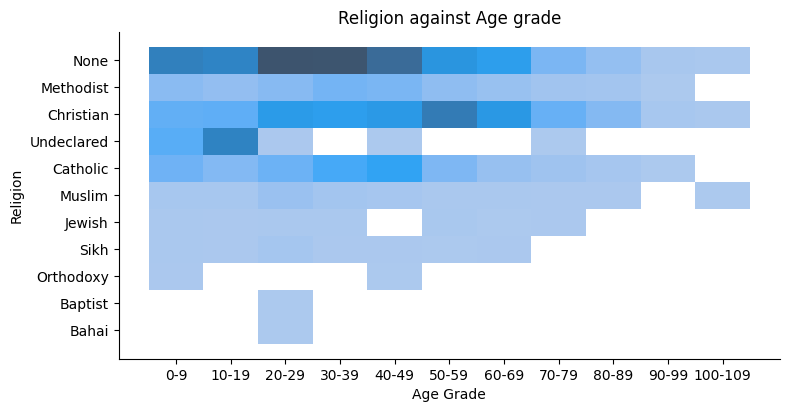

In [213]:
sns.displot(census_data, y='Religion', x='Age Grade', aspect=2, height=4).set(title='Religion against Age grade')

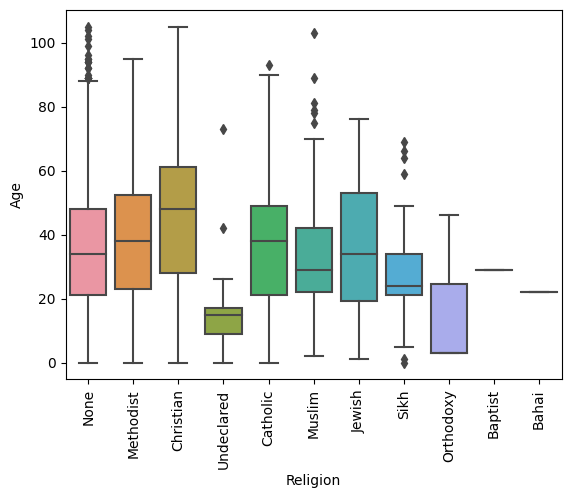

In [214]:
religion_age = sns.boxplot(x=census_data.Religion, y=census_data.Age)
plt.xticks(rotation=90)
plt.show()

In [215]:
# profile = ProfileReport(census_data, title= 'Pandas Profiling Report', explorative=True)

In [216]:
# profile

### Birth Rate Calculation

In [217]:
# Assigning all the new borns to a variable
new_borns =census_data.loc[census_data['Age'] <= 1]

In [218]:
# Code validation
new_borns

,House Number,Street,First Name,Surname,Age,Age Grade,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Occupation Category
19,6,Cannon Street,Yvonne,Roberts,1,0-9,Granddaughter,Not_Applicable,Female,Child,None,Undeclared,Child
40,6,September Lake,Eileen,Davies,1,0-9,Daughter,Not_Applicable,Female,Child,None,Undeclared,Child
44,8,September Lake,Connor,Johnson,0,0-9,Son,Not_Applicable,Male,Child,None,None,Child
90,14,Gill Heights,Duncan,Bennett,1,0-9,Son,Not_Applicable,Male,Child,None,Christian,Child
96,17,Gill Heights,Laura,Campbell,0,0-9,Granddaughter,Not_Applicable,Female,Child,None,Undeclared,Child
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5899,23,Fisher Lane,Paula,Coleman,0,0-9,Granddaughter,Not_Applicable,Female,Child,None,Undeclared,Child
5908,1,July Keep,Leah,Knowles,1,0-9,Daughter,Not_Applicable,Female,Child,None,None,Child
5909,1,July Keep,Damien,Knowles,0,0-9,Son,Not_Applicable,Male,Child,None,None,Child
5928,1,CherryChestnut Fortress,Nicola,Moore,0,0-9,Daughter,Not_Applicable,Female,Child,None,Catholic,Child


### Current Birth Rate

In [219]:
# getting the total number of new borns
birth_number_newborns = len(census_data.loc[census_data['Age'] <= 1])
# getting the total number of population
population_count = len(census_data)

In [220]:
# gets the total number of new borns per 1000 people in the census
birth_rate_newborns = (birth_number_newborns / population_count * 1000)

In [221]:
birth_rate_newborns

20.333333333333332

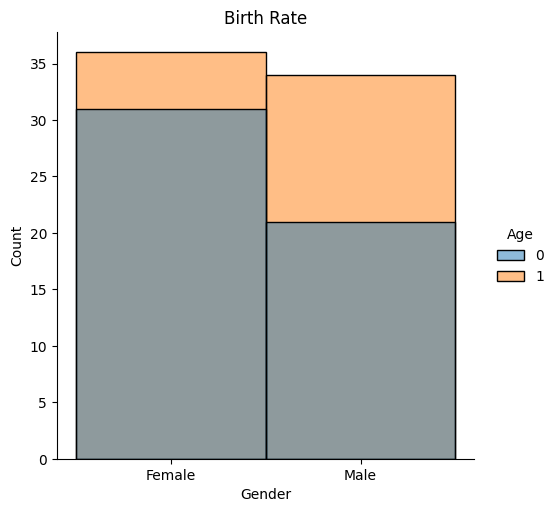

In [222]:
# displays the newborns seperating age category and gender
sns.displot(new_borns, x='Gender', hue='Age')
plt.savefig('birth.png', dpi=200, bbox_inches='tight')
plt.title('Birth Rate')
plt.show()

In [223]:
ages_4 =census_data.loc[census_data['Age'] == 4]

In [224]:
ages_4

,House Number,Street,First Name,Surname,Age,Age Grade,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Occupation Category
60,3,Gill Heights,Douglas,Lewis,4,0-9,Son,Not_Applicable,Male,Child,None,None,Child
124,31,Gill Heights,Allan,Harrison,4,0-9,Son,Not_Applicable,Male,Child,None,Christian,Child
300,39,Musictill Drive,Paige,Jones,4,0-9,Daughter,Not_Applicable,Female,Child,None,Undeclared,Child
328,47,Musictill Drive,Clare,Wood,4,0-9,Daughter,Not_Applicable,Female,Child,None,None,Child
429,3,Ripon Port,Toby,King,4,0-9,Son,Not_Applicable,Male,Child,None,None,Child
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5159,19,Horselink Street,Jonathan,Watson,4,0-9,Son,Not_Applicable,Male,Child,None,None,Child
5202,19,Evans Road,Kate,Owen-Lynch,4,0-9,Granddaughter,Not_Applicable,Female,Child,None,Undeclared,Child
5203,19,Evans Road,Vincent,Adams-Owen-Lynch,4,0-9,Grandson,Not_Applicable,Male,Child,None,Undeclared,Child
5853,27,Davidson Crescent,Gordon,Connor-Andrews,4,0-9,Son,Not_Applicable,Male,Child,None,Methodist,Child


### Current Fertility Rate

In [225]:
# fertility rate in the population
women_conceiveable_age = len(census_data.loc[(census_data['Age'] >= 16)&(census_data['Age'] <= 45)&(census_data['Gender'] == 'Female')])

In [226]:
women_conceiveable_age

1517

In [227]:
# getting the total number of new borns
birth_number_newborns = len(census_data.loc[census_data['Age'] <= 1])
# getting the total number of population
population_count = len(census_data)

In [228]:
# Code validation
birth_number_newborns

122

In [229]:
# gets the total number of new borns per 1000 people in the census
fertility_rate = (birth_number_newborns / women_conceiveable_age * 1000)

In [230]:
# Code validation
fertility_rate

80.42188529993408

### Determining if birth rate increased over the last 4 years

In [231]:
# gets the length of children that are 4 years to estimate if the population is increasing
birth_number_ages4 = len(census_data.loc[census_data['Age'] == 4])

In [232]:
#Code validation
birth_number_ages4

71

In [233]:
# get the number of women within conceivable age 4 years before census
women_conceiveable_age_4years_before = len(census_data.loc[(census_data['Age'] >= 20)&(census_data['Age'] <= 49)&(census_data['Gender'] == 'Female')])

In [234]:
kids_removedFrom_population = len(census_data.loc[census_data['Age'] <4])

In [235]:
# subtracting the current population by the number of new borns to estimate the previous population
population_count_withKids_removed= population_count - kids_removedFrom_population

In [236]:
#estimated population
population_count_withKids_removed

5750

### Birth Rate 4 years ago

In [237]:
birthRate_4years_before = (birth_number_ages4 / population_count_withKids_removed  * 1000)

In [238]:
birthRate_4years_before

12.347826086956522

### Fertility Rate 4 years before

In [239]:
# fertility rate for newborns 4years ago
fertilityRate_4years_before = (birth_number_ages4 / women_conceiveable_age_4years_before  * 1000)

In [240]:
fertilityRate_4years_before

47.20744680851064

#### Current birth rate - birth rate 4 years ago

In [241]:
birth_difference = birth_rate_newborns - birthRate_4years_before

In [242]:
birth_difference

7.985507246376811

### Death Rate

In [243]:
# Assigning all the deceased to a variable
deceased_age_range = census_data.loc[census_data['Age'] >= 75]

In [244]:
# Code validation
deceased_age_range

,House Number,Street,First Name,Surname,Age,Age Grade,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Occupation Category
48,9,September Lake,Marie,Wilkinson,95,90-99,Head,Married,Female,Retired,None,Christian,Retired
49,9,September Lake,Joseph,Wilkinson,97,90-99,Husband,Married,Male,Retired,None,Christian,Retired
94,16,Gill Heights,Ben,Clarke,78,70-79,Husband,Married,Male,Retired,None,Christian,Retired
141,36,Gill Heights,Jodie,Watts,76,70-79,Head,Widowed,Female,Retired,None,Christian,Retired
158,41,Gill Heights,Brenda,Wilson,88,80-89,Head,Married,Female,Retired,None,None,Retired
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5800,6,Davidson Crescent,Alex,Harrison,87,80-89,Head,Married,Male,Retired,None,Christian,Retired
5801,6,Davidson Crescent,Sally,Harrison,82,80-89,Wife,Married,Female,Retired,None,None,Retired
5808,10,Davidson Crescent,Katy,Dixon,86,80-89,Head,Married,Female,Retired,None,Christian,Retired
5809,10,Davidson Crescent,Cameron,Dixon,88,80-89,Husband,Married,Male,Retired,None,None,Retired


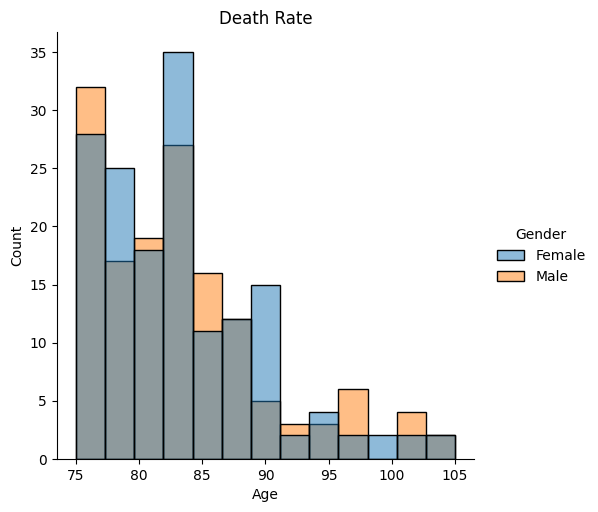

In [245]:
# displays the newborns seperating age category and gender
sns.displot(deceased_age_range, x='Age', hue='Gender')
plt.savefig('death_rate.png', dpi=200, bbox_inches='tight')
plt.title('Death Rate')
plt.show()

In [246]:
# calculating the age intervals 
age_70_79 = census_data['Age'].between(70, 79).sum()
age_80_89 = census_data['Age'].between(80, 89).sum()
age_90_99 = census_data['Age'].between(90, 99).sum()
age_100_109 = census_data['Age'].between(100, 109).sum()

In [247]:
# prints the age intervals between the age grades and theyt get older
print(f'{age_70_79},{age_80_89},{age_90_99},{age_100_109}')

281,166,25,11


In [248]:
#getting the total number of people in the potential death age range
sum_ageAbove65_deathRate = age_70_79 + age_80_89 + age_90_99 + age_100_109

In [249]:
# diving the sum of people in potential death range by 10(age grade gap) to make up for possibility of migration and unavailability as a result of unforseen circumstances
potential_deathrange =sum_ageAbove65_deathRate/10
potential_deathrange

48.3

In [250]:
# estimated death rate per 1000 people age 76 and above
possible_death_rate = (potential_deathrange / population_count * 1000)

In [251]:
# code validation
possible_death_rate

8.05